## Analiza Environmental data: Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib widget

### Prvi korak - istraživanje podataka

In [3]:
data = pd.read_csv("environment_data.csv")

In [4]:
data.columns

Index(['timestamp', 'sound', 'pressure', 'temp', 'humidity', 'voc', 'pm1.0',
       'pm2.5', 'pm10', 'CO2'],
      dtype='object')

In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345151 entries, 2022-11-07 00:00:01 to 2022-11-10 23:59:59
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sound     345151 non-null  float64
 1   pressure  345151 non-null  float64
 2   temp      345151 non-null  float64
 3   humidity  345151 non-null  float64
 4   voc       345151 non-null  float64
 5   pm1.0     345151 non-null  float64
 6   pm2.5     345151 non-null  float64
 7   pm10      345151 non-null  float64
 8   CO2       344264 non-null  float64
dtypes: float64(9)
memory usage: 26.3 MB


In [7]:
data.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349  29466.0   
2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125  29467.0   
2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384  29459.0   
2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384  29454.0   
2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405  29458.5   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:01   26.0   36.0  45.0  421.0  
2022-11-07 00:00:02   26.0   36.0  45.0  419.0  
2022-11-07 00:00:03   26.0   36.0  45.0  418.0  
2022-11-07 00:00:04   26.0   36.0  44.0  418.0  
2022-11-07 00:00:05   26.0   36.0  44.0  416.0

In [8]:
data.tail()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-10 23:59:55  1.045672  1023.909475  25.752187  34.016978  29363.0   
2022-11-10 23:59:56  1.042445  1023.909475  25.747058  34.022710  29374.0   
2022-11-10 23:59:57  1.110220  1023.901703  25.736801  34.022842  29379.0   
2022-11-10 23:59:58  1.046479  1023.878387  25.729108  34.054104  29372.5   
2022-11-10 23:59:59  1.131198  1023.905394  25.726544  34.045638  29359.0   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-10 23:59:55   31.0   45.0  56.0  467.0  
2022-11-10 23:59:56   31.0   45.0  56.0  467.0  
2022-11-10 23:59:57   31.0   45.0  56.0  467.0  
2022-11-10 23:59:58   30.5   44.5  55.5  468.0  
2022-11-10 23:59:59   30.0   44.0  55.0  470.0

In [9]:
data.describe()

sound       pressure           temp       humidity  \
count  345151.000000  345151.000000  345151.000000  345151.000000   
mean        1.035109    1014.807431      25.123033      34.636160   
std         0.493434       2.517912       1.210600       2.652997   
min         0.000000    1005.339453      20.326285      26.962989   
25%         0.931100    1013.215952      24.470044      32.984199   
50%         1.035990    1014.020586      24.972642      34.628268   
75%         1.229633    1015.415069      25.782958      36.830740   
max         3.303227    1024.071917      28.293446      41.651724   

                 voc          pm1.0          pm2.5           pm10  \
count  345151.000000  345151.000000  345151.000000  345151.000000   
mean    30512.354483      49.980410      68.674444      79.883421   
std      1329.625356      27.035828      31.107893      30.668957   
min     28427.000000      20.000000      30.000000      33.000000   
25%     29458.000000      33.000000      48.000000      61.000000   
50%     29964.500000      38.000000      54.000000      68.000000   
75%     31443.000000      59.000000      85.000000      93.000000   
max     34535.000000     270.500000     279.500000     428.000000   

                 CO2  
count  344264.000000  
mean      442.465660  
std        28.831611  
min       400.000000  
25%       418.000000  
50%       440.000000  
75%       462.000000  
max       562.000000

In [10]:
data.var()

sound       2.434773e-01
pressure    6.339881e+00
temp        1.465552e+00
humidity    7.038394e+00
voc         1.767904e+06
pm1.0       7.309360e+02
pm2.5       9.677010e+02
pm10        9.405849e+02
CO2         8.312618e+02
dtype: float64

In [11]:
data.skew()

sound       0.390953
pressure    1.944262
temp        0.120681
humidity   -0.323284
voc         0.762294
pm1.0       1.698947
pm2.5       1.425518
pm10        1.516714
CO2         0.526927
dtype: float64

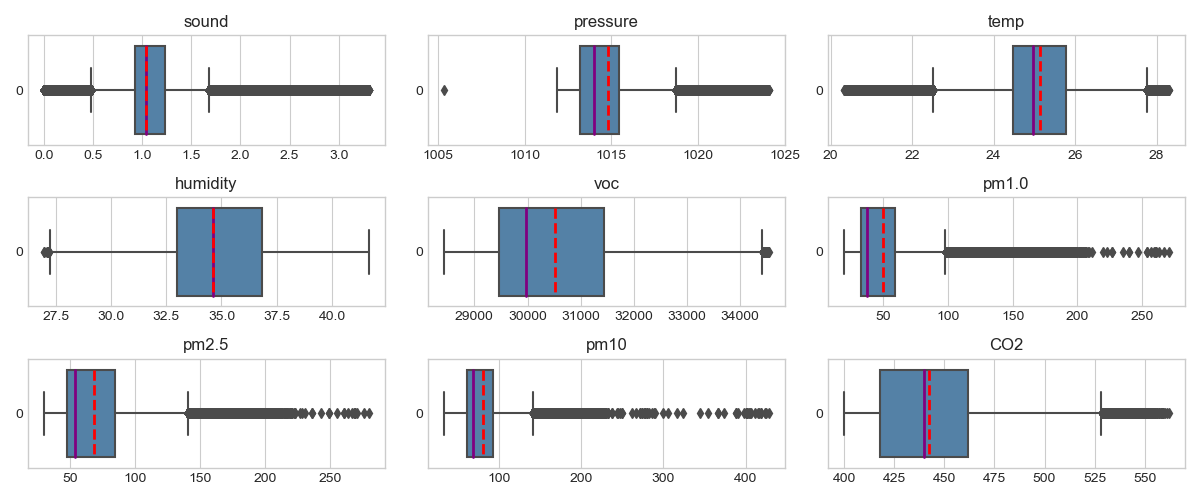

In [12]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title(feature)
    sns.boxplot(data[feature], orient='h', color="steelblue", showmeans=True, meanline=True,
                    medianprops={'linewidth': 2, 'color': 'purple'},
                    meanprops={'linewidth': 2, 'color': 'red'})
plt.tight_layout()

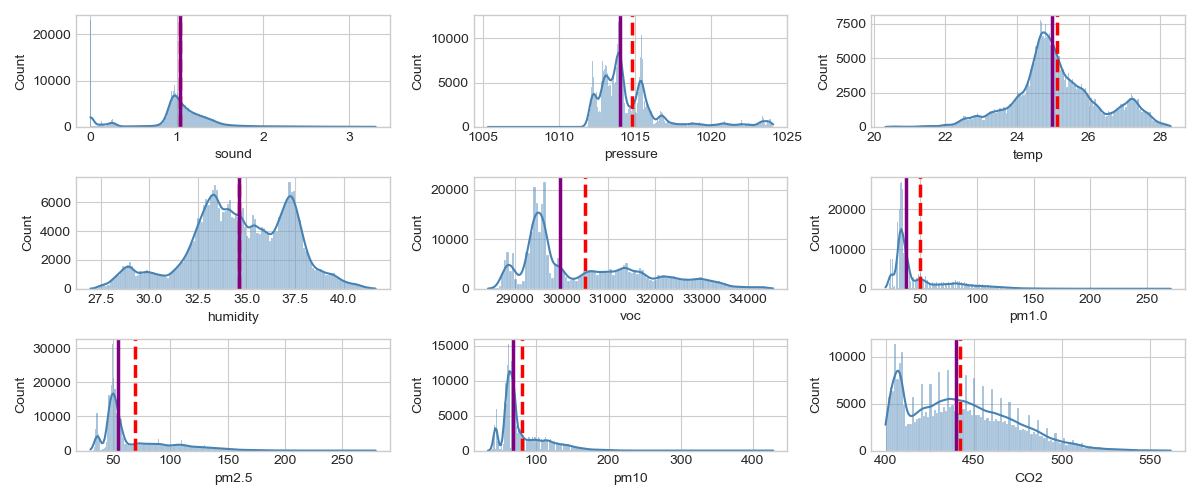

In [13]:
plt.figure(figsize=(12, 5))
for i, feature in enumerate(list(data.columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True, color="steelblue")
    plt.axvline(x=data[feature].mean(), c='red', ls='--', lw=2.5)
    plt.axvline(x=data[feature].median(), c='purple', ls='-', lw=2.5)
plt.tight_layout()

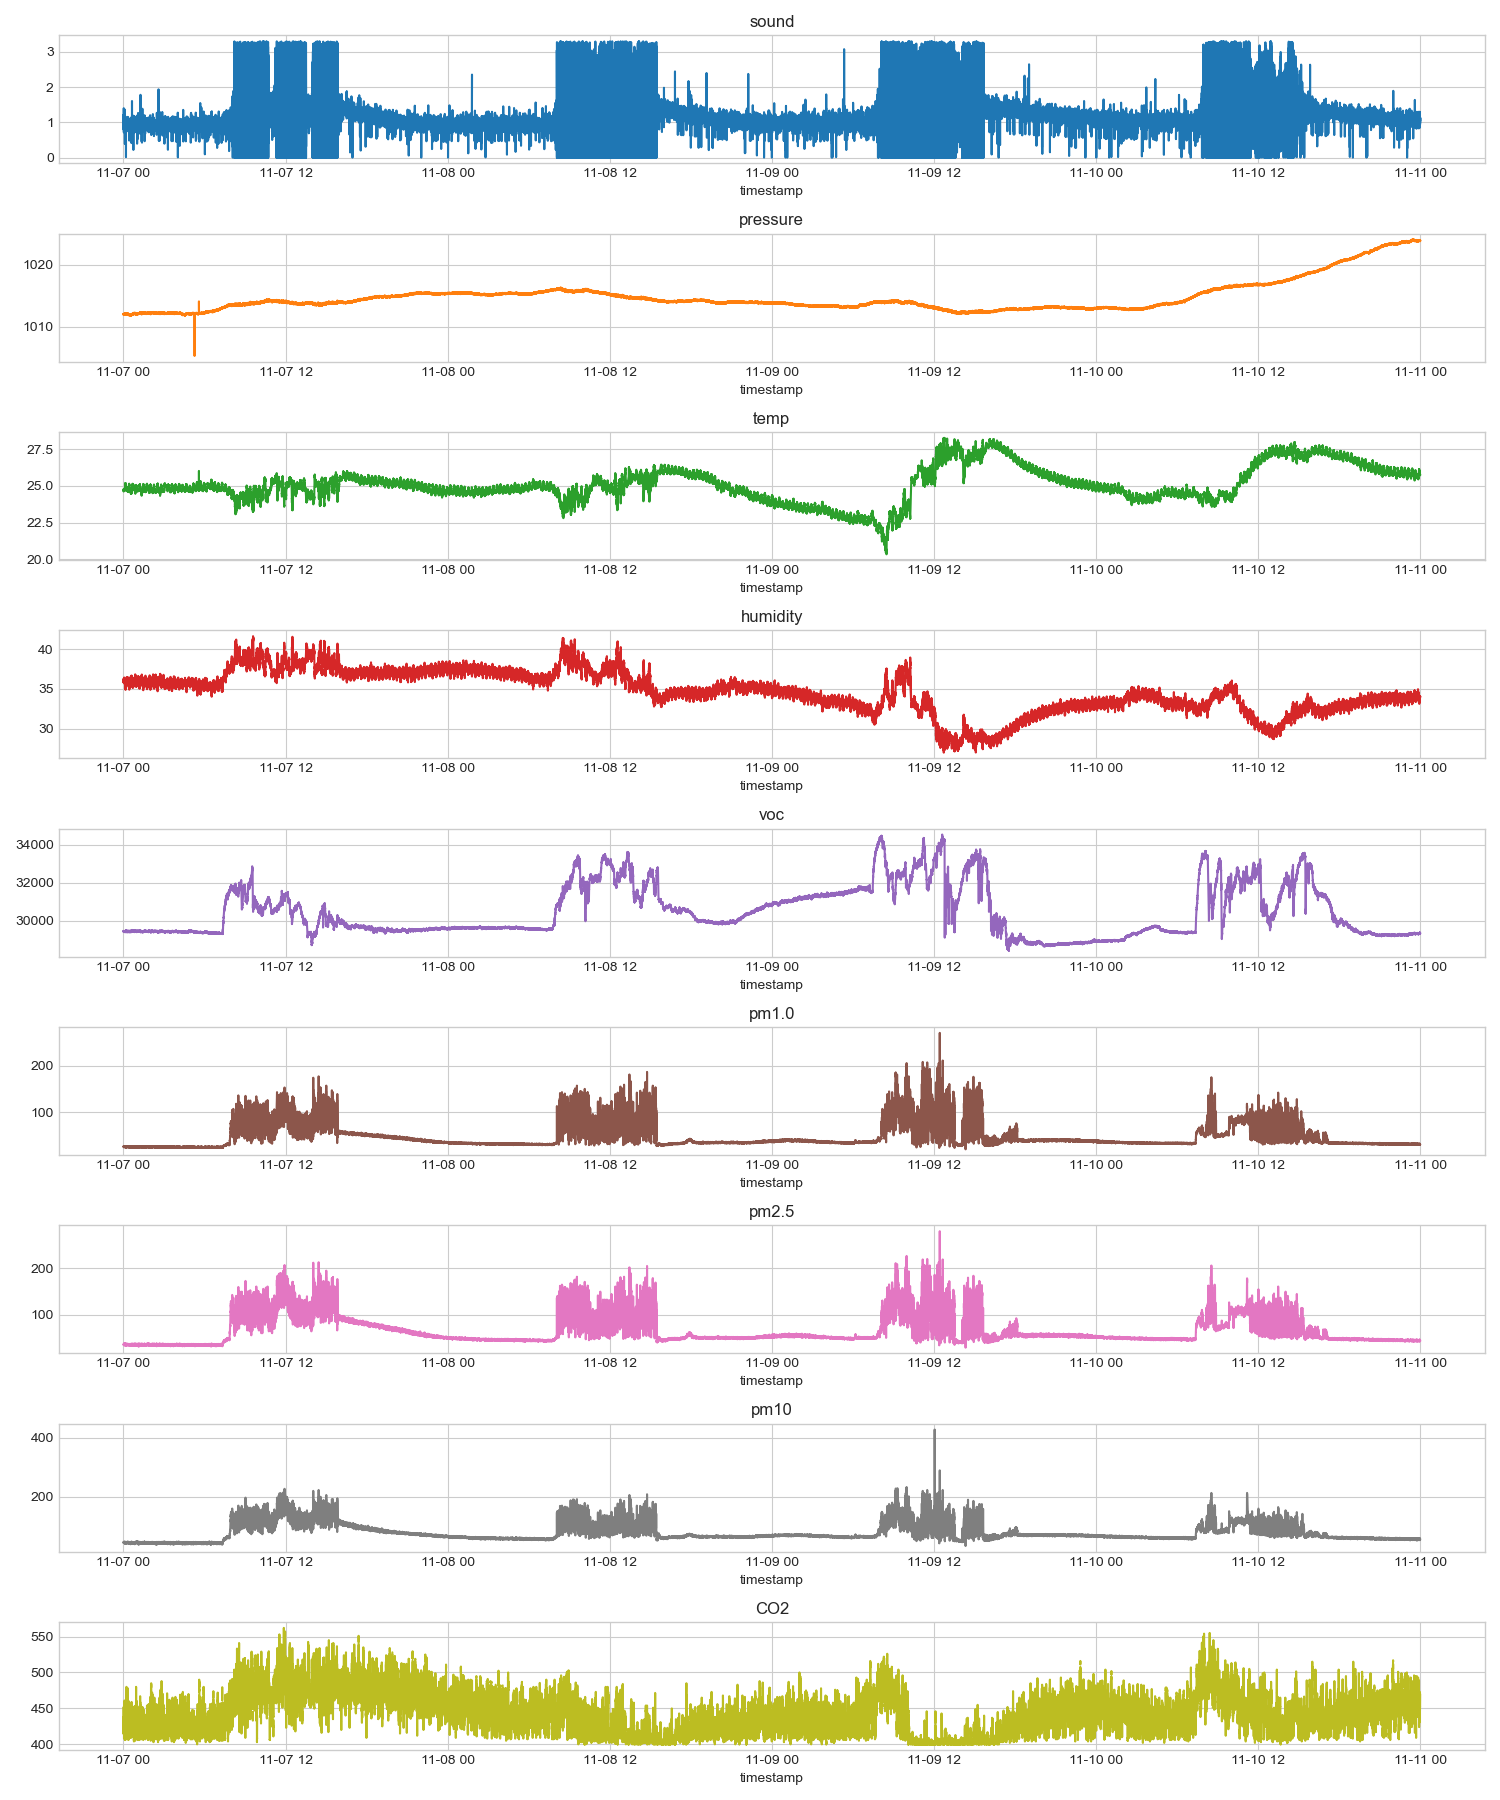

In [14]:
data.plot(figsize=(15, 18), subplots=True, sharex=False, legend=False, title=list(data.columns))
plt.tight_layout()

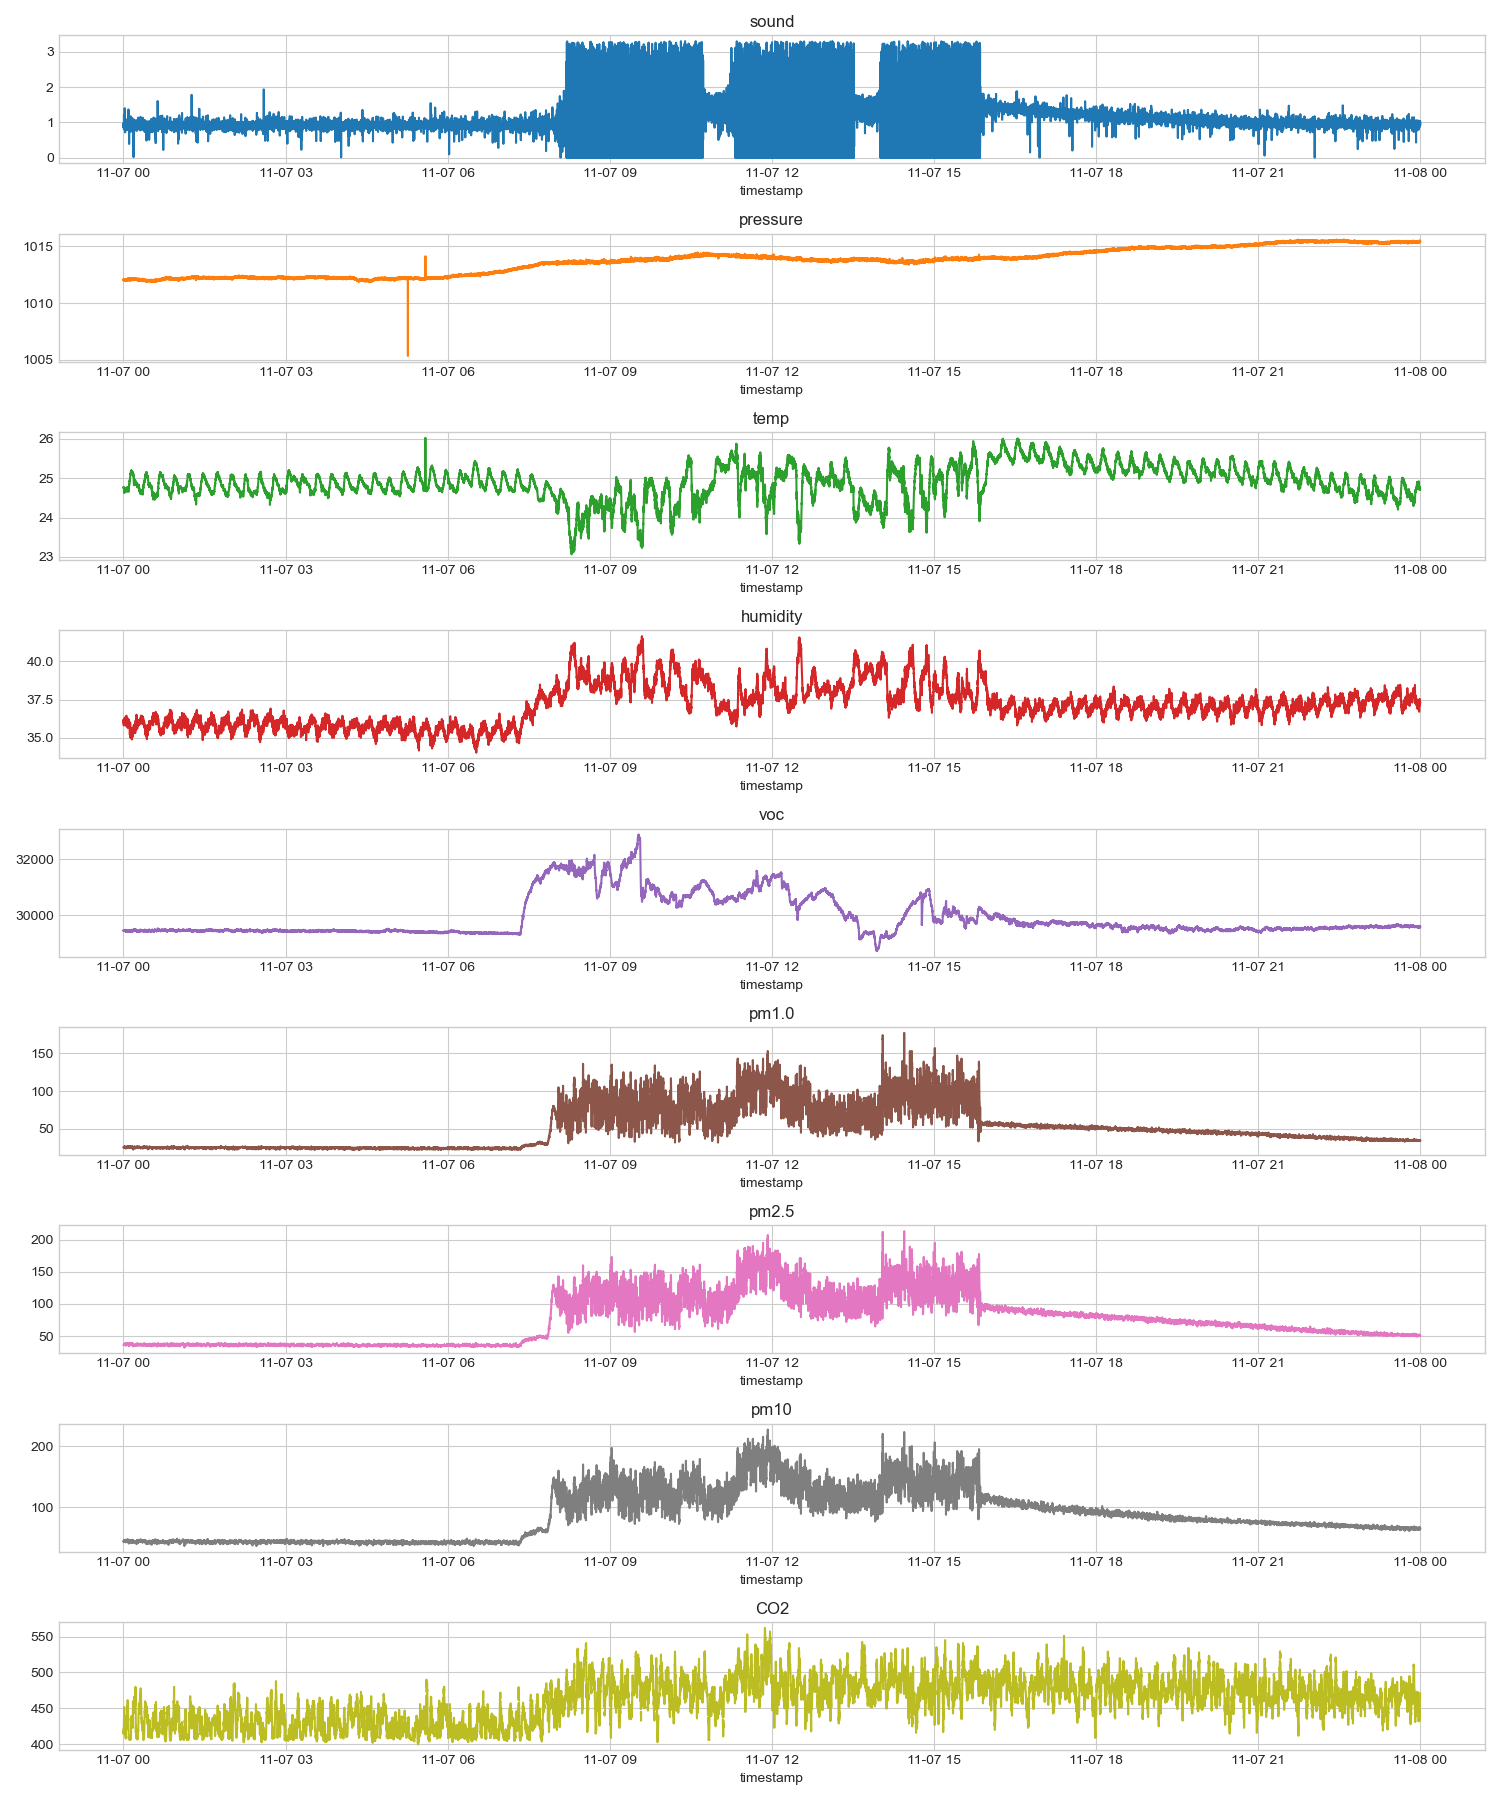

In [15]:
data[:86400].plot(figsize=(15, 18), subplots=True, sharex=False, legend=False, title=list(data.columns))
plt.tight_layout()

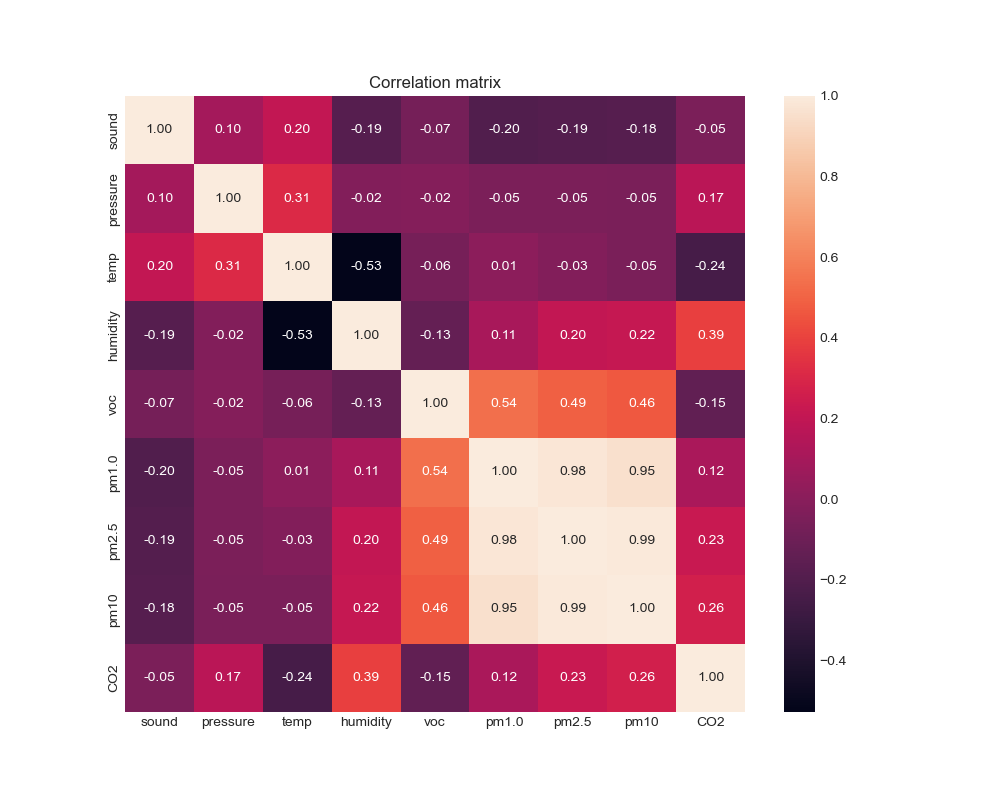

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title("Correlation matrix")
plt.show()

### Drugi korak - preprocesiranje podataka

In [17]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
sound         0
pressure      0
temp          0
humidity      0
voc           0
pm1.0         0
pm2.5         0
pm10          0
CO2         887
dtype: int64


In [18]:
data['CO2']= data['CO2'].interpolate(method='linear')

In [19]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
sound       0
pressure    0
temp        0
humidity    0
voc         0
pm1.0       0
pm2.5       0
pm10        0
CO2         0
dtype: int64


In [20]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


In [21]:
print(f"Number of index duplicates in dataset: {data.index.duplicated().sum()}")

Number of index duplicates in dataset: 24


In [22]:
data[data.index.duplicated()]

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 01:00:00  0.927873  1012.029181  24.885456  35.769386  29454.0   
2022-11-07 05:00:00  0.929487  1012.083651  24.726471  35.821613  29466.0   
2022-11-07 09:00:00  0.731002  1013.577997  24.454659  38.499439  31630.0   
2022-11-07 10:00:00  1.844450  1013.874410  24.449530  38.928240  30666.0   
2022-11-07 11:00:00  1.591100  1014.204036  25.552171  36.589889  30518.0   
2022-11-07 16:00:00  1.391002  1013.957464  25.500885  37.518162  29939.0   
2022-11-08 04:00:00  0.874621  1015.260768  24.695700  37.036374  29647.0   
2022-11-08 05:00:00  1.032763  1015.392091  25.167527  36.219366  29643.0   
2022-11-08 07:00:00  0.916577  1015.672999  24.782885  36.691268  29551.0   
2022-11-08 11:00:00  0.950465  1015.642579  25.131627  36.813337  32351.0   
2022-11-08 12:00:00  1.899315  1015.222323  24.741857  38.182545  32943.0   
2022-11-08 15:00:00  0.000000  1014.405803  24.705957  36.657881  32743.0   
2022-11-09 08:00:00  1.006944  1014.055515  22.269931  32.164413  34351.0   
2022-11-09 14:00:00  1.358729  1012.260030  27.690820  27.930858  31607.0   
2022-11-09 16:00:00  1.457164  1012.446049  27.680563  28.620852  31522.0   
2022-11-09 17:00:00  1.392616  1012.778688  27.654919  28.963446  29666.0   
2022-11-09 20:00:00  1.263521  1013.127483  25.680386  32.244212  28815.0   
2022-11-09 23:00:00  1.118289  1013.048194  25.352156  32.515925  28827.0   
2022-11-10 09:00:00  2.055844  1016.085144  23.905907  34.982371  32659.0   
2022-11-10 10:00:00  2.057457  1016.529830  24.259775  34.911033  32403.0   
2022-11-10 12:00:00  0.414719  1016.921382  26.465065  30.742856  32603.0   
2022-11-10 13:00:00  1.160244  1017.015528  27.054862  30.252861  30294.0   
2022-11-10 17:00:00  1.273203  1019.435077  27.229237  32.337065  31342.0   
2022-11-10 21:00:00  0.982738  1022.787157  26.290692  33.442614  29251.0   

                     pm1.0  pm2.5   pm10    CO2  
timestamp                                        
2022-11-07 01:00:00   25.0   36.0   44.0  449.0  
2022-11-07 05:00:00   26.0   37.0   45.0  408.0  
2022-11-07 09:00:00   69.0  103.0  119.0  487.0  
2022-11-07 10:00:00   94.0  126.0  139.0  487.0  
2022-11-07 11:00:00   46.0   78.0   92.0  436.0  
2022-11-07 16:00:00   57.0   97.0  121.0  496.0  
2022-11-08 04:00:00   32.0   47.0   59.0  439.0  
2022-11-08 05:00:00   32.0   46.0   58.0  408.0  
2022-11-08 07:00:00   31.0   46.0   57.0  425.0  
2022-11-08 11:00:00   75.0   94.0  100.0  409.0  
2022-11-08 12:00:00   66.0   85.0   95.0  409.0  
2022-11-08 15:00:00  105.0  119.0  123.0  404.0  
2022-11-09 08:00:00   39.0   57.0   78.0  485.0  
2022-11-09 14:00:00   30.0   42.0   50.0  403.0  
2022-11-09 16:00:00   34.0   48.0   60.0  402.0  
2022-11-09 17:00:00   38.0   53.0   68.0  408.0  
2022-11-09 20:00:00   39.0   56.0   70.0  462.0  
2022-11-09 23:00:00   39.0   55.0   69.0  438.0  
2022-11-10 09:00:00   48.0   68.0   74.0  505.0  
2022-11-10 10:00:00   80.0  105.0  112.0  470.0  
2022-11-10 12:00:00   71.0   95.0  101.0  409.0  
2022-11-10 13:00:00   76.0   96.0  101.0  441.0  
2022-11-10 17:00:00   49.0   62.0   72.0  432.0  
2022-11-10 21:00:00   32.0   46.0   58.0  436.0

In [23]:
data = data[~data.index.duplicated(keep='first')]

In [24]:
data.resample('s').interpolate().reset_index()

timestamp     sound     pressure       temp   humidity  \
0      2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349   
1      2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125   
2      2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384   
3      2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384   
4      2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405   
...                    ...       ...          ...        ...        ...   
345594 2022-11-10 23:59:55  1.045672  1023.909475  25.752187  34.016978   
345595 2022-11-10 23:59:56  1.042445  1023.909475  25.747058  34.022710   
345596 2022-11-10 23:59:57  1.110220  1023.901703  25.736801  34.022842   
345597 2022-11-10 23:59:58  1.046479  1023.878387  25.729108  34.054104   
345598 2022-11-10 23:59:59  1.131198  1023.905394  25.726544  34.045638   

            voc  pm1.0  pm2.5  pm10    CO2  
0       29466.0   26.0   36.0  45.0  421.0  
1       29467.0   26.0   36.0  45.0  419.0  
2       29459.0   26.0   36.0  45.0  418.0  
3       29454.0   26.0   36.0  44.0  418.0  
4       29458.5   26.0   36.0  44.0  416.0  
...         ...    ...    ...   ...    ...  
345594  29363.0   31.0   45.0  56.0  467.0  
345595  29374.0   31.0   45.0  56.0  467.0  
345596  29379.0   31.0   45.0  56.0  467.0  
345597  29372.5   30.5   44.5  55.5  468.0  
345598  29359.0   30.0   44.0  55.0  470.0  

[345599 rows x 10 columns]

In [25]:
data.resample('30s').interpolate().reset_index()

timestamp     sound     pressure       temp   humidity  \
0     2022-11-07 00:00:00       NaN          NaN        NaN        NaN   
1     2022-11-07 00:00:30  0.956112  1012.062426  24.739293  36.041862   
2     2022-11-07 00:01:00  0.964988  1011.991563  24.623900  36.195291   
3     2022-11-07 00:01:30  0.995648  1012.033767  24.670057  36.177992   
4     2022-11-07 00:02:00  0.914963  1012.072187  24.711086  36.149430   
...                   ...       ...          ...        ...        ...   
11515 2022-11-10 23:57:30  1.106993  1023.900574  26.003489  33.594159   
11516 2022-11-10 23:58:00  1.086015  1023.942064  25.906045  33.742903   
11517 2022-11-10 23:58:30  1.086015  1023.956866  25.854759  33.873960   
11518 2022-11-10 23:59:00  1.071491  1023.875457  25.808601  33.953912   
11519 2022-11-10 23:59:30  1.047286  1023.828831  25.793215  33.976780   

           voc  pm1.0  pm2.5  pm10    CO2  
0          NaN    NaN    NaN   NaN    NaN  
1      29462.5   25.0   36.0  45.0  421.5  
2      29463.0   26.0   38.0  47.0  440.0  
3      29451.0   27.0   38.0  45.0  419.0  
4      29450.0   26.0   37.0  47.0  435.0  
...        ...    ...    ...   ...    ...  
11515  29354.0   32.0   46.0  56.0  441.0  
11516  29367.0   30.0   44.0  54.0  470.0  
11517  29362.0   32.0   46.0  57.0  451.0  
11518  29359.0   31.0   46.0  57.0  448.0  
11519  29363.0   31.0   45.0  57.0  452.0  

[11520 rows x 10 columns]

In [26]:
data_1s = data.resample('s').interpolate().reset_index()
data_1s['timestamp'] = pd.to_datetime(data_1s['timestamp'])
data_1s.set_index('timestamp', inplace=True)

data_30s = data.resample('30s').interpolate().reset_index().dropna()
data_30s.reset_index(drop=True, inplace=True)
data_30s['timestamp'] = pd.to_datetime(data_30s['timestamp'])
data_30s.set_index('timestamp', inplace=True)

In [27]:
data_1s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345599 entries, 2022-11-07 00:00:01 to 2022-11-10 23:59:59
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sound     345599 non-null  float64
 1   pressure  345599 non-null  float64
 2   temp      345599 non-null  float64
 3   humidity  345599 non-null  float64
 4   voc       345599 non-null  float64
 5   pm1.0     345599 non-null  float64
 6   pm2.5     345599 non-null  float64
 7   pm10      345599 non-null  float64
 8   CO2       345599 non-null  float64
dtypes: float64(9)
memory usage: 26.4 MB


In [28]:
data_1s.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:01  0.881076  1012.037290  24.777757  35.996349  29466.0   
2022-11-07 00:00:02  0.863325  1012.025698  24.762371  36.002125  29467.0   
2022-11-07 00:00:03  0.908509  1012.083523  24.767500  36.013384  29459.0   
2022-11-07 00:00:04  0.924645  1012.091207  24.767500  36.013384  29454.0   
2022-11-07 00:00:05  0.896406  1012.091207  24.764935  36.013405  29458.5   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:01   26.0   36.0  45.0  421.0  
2022-11-07 00:00:02   26.0   36.0  45.0  419.0  
2022-11-07 00:00:03   26.0   36.0  45.0  418.0  
2022-11-07 00:00:04   26.0   36.0  44.0  418.0  
2022-11-07 00:00:05   26.0   36.0  44.0  416.0

In [29]:
data_30s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11519 entries, 2022-11-07 00:00:30 to 2022-11-10 23:59:30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sound     11519 non-null  float64
 1   pressure  11519 non-null  float64
 2   temp      11519 non-null  float64
 3   humidity  11519 non-null  float64
 4   voc       11519 non-null  float64
 5   pm1.0     11519 non-null  float64
 6   pm2.5     11519 non-null  float64
 7   pm10      11519 non-null  float64
 8   CO2       11519 non-null  float64
dtypes: float64(9)
memory usage: 899.9 KB


In [30]:
data_30s.head()

sound     pressure       temp   humidity      voc  \
timestamp                                                                   
2022-11-07 00:00:30  0.956112  1012.062426  24.739293  36.041862  29462.5   
2022-11-07 00:01:00  0.964988  1011.991563  24.623900  36.195291  29463.0   
2022-11-07 00:01:30  0.995648  1012.033767  24.670057  36.177992  29451.0   
2022-11-07 00:02:00  0.914963  1012.072187  24.711086  36.149430  29450.0   
2022-11-07 00:02:30  0.935941  1012.041327  24.741857  36.115291  29450.0   

                     pm1.0  pm2.5  pm10    CO2  
timestamp                                       
2022-11-07 00:00:30   25.0   36.0  45.0  421.5  
2022-11-07 00:01:00   26.0   38.0  47.0  440.0  
2022-11-07 00:01:30   27.0   38.0  45.0  419.0  
2022-11-07 00:02:00   26.0   37.0  47.0  435.0  
2022-11-07 00:02:30   25.0   37.0  44.0  408.0

In [31]:
scaler_1s = StandardScaler()
scaled_data_1s = scaler_1s.fit_transform(data_1s)
scaled_data_df_1s = pd.DataFrame(scaled_data_1s, columns=data_1s.columns, index=data_1s.index)
scaled_data_df_1s.drop(["pm10", "pm1.0"], axis=1, inplace=True)

In [32]:
scaler_30s = StandardScaler()
scaled_data_30s = scaler_30s.fit_transform(data_30s)
scaled_data_df_30s = pd.DataFrame(scaled_data_30s, columns=data_30s.columns, index=data_30s.index)
scaled_data_df_30s.drop(["pm10", "pm1.0"], axis=1, inplace=True)

### Treći korak - primena hijerarhijskog klasterovanja

In [33]:
def create_dendrogram(linkage, metric, method):
    plt.figure(figsize=(15, 6))
    dendrogram(linkage)
    plt.title(f"Dendrogram - method: {method}, metric: {metric}")
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [34]:
def evaluate_linkage(data, metric, linkage_methods):
    coph_correlations = {}
    linkages = {}
    res = {}

    for method in linkage_methods:
        z = linkage(data, metric=metric, method=method)
        c, coph_distances = cophenet(z, pdist(data, metric=metric))
        coph_correlations[method] = c
        linkages[method] = z

        create_dendrogram(z, metric, method)

    res["coph_correlations"] = coph_correlations
    res["linkages"] = linkages

    return res

In [35]:
linkage_methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

In [61]:
euclidean_res = evaluate_linkage(scaled_data_df_1s, "euclidean", linkage_methods)

MemoryError: Unable to allocate 445. GiB for an array with shape (59719161601,) and data type float64

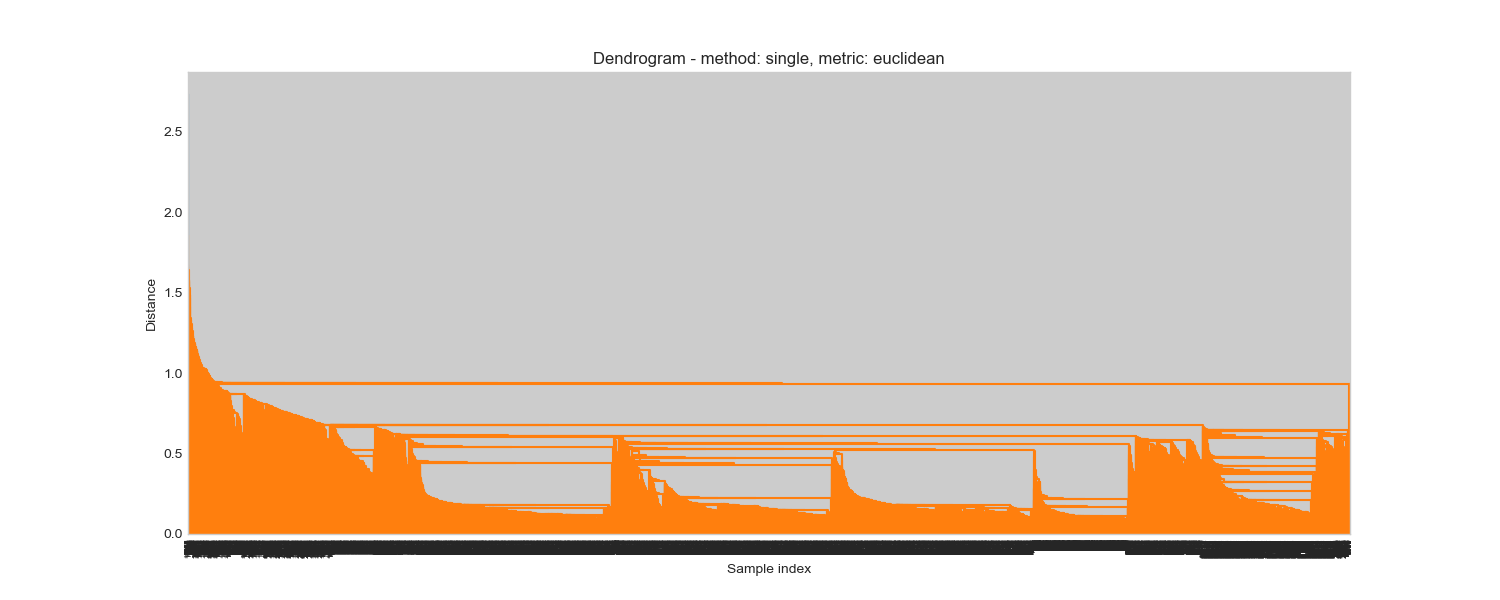

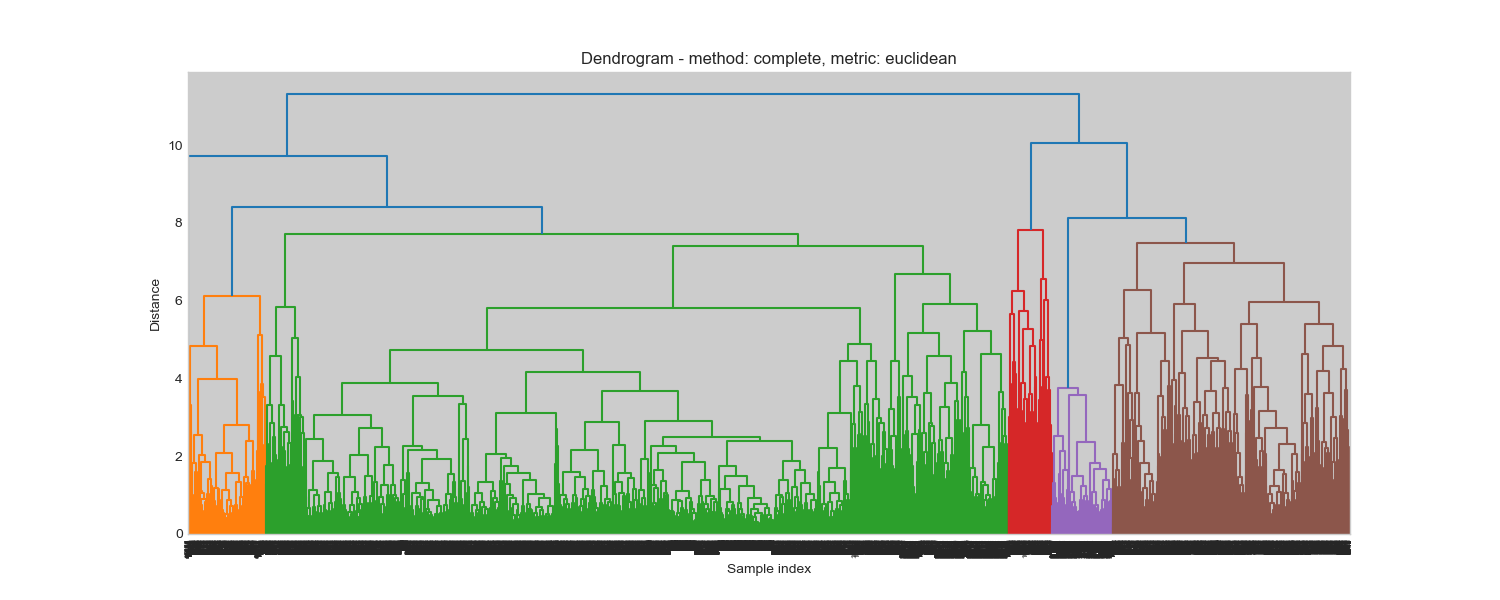

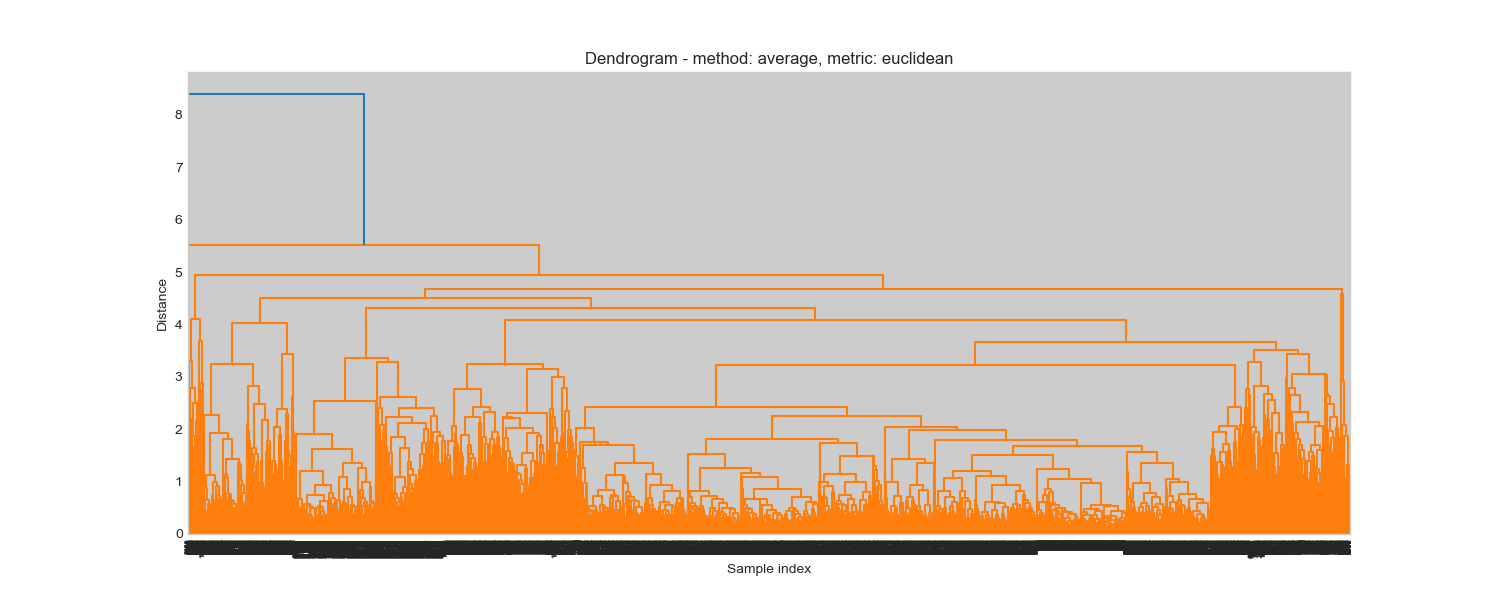

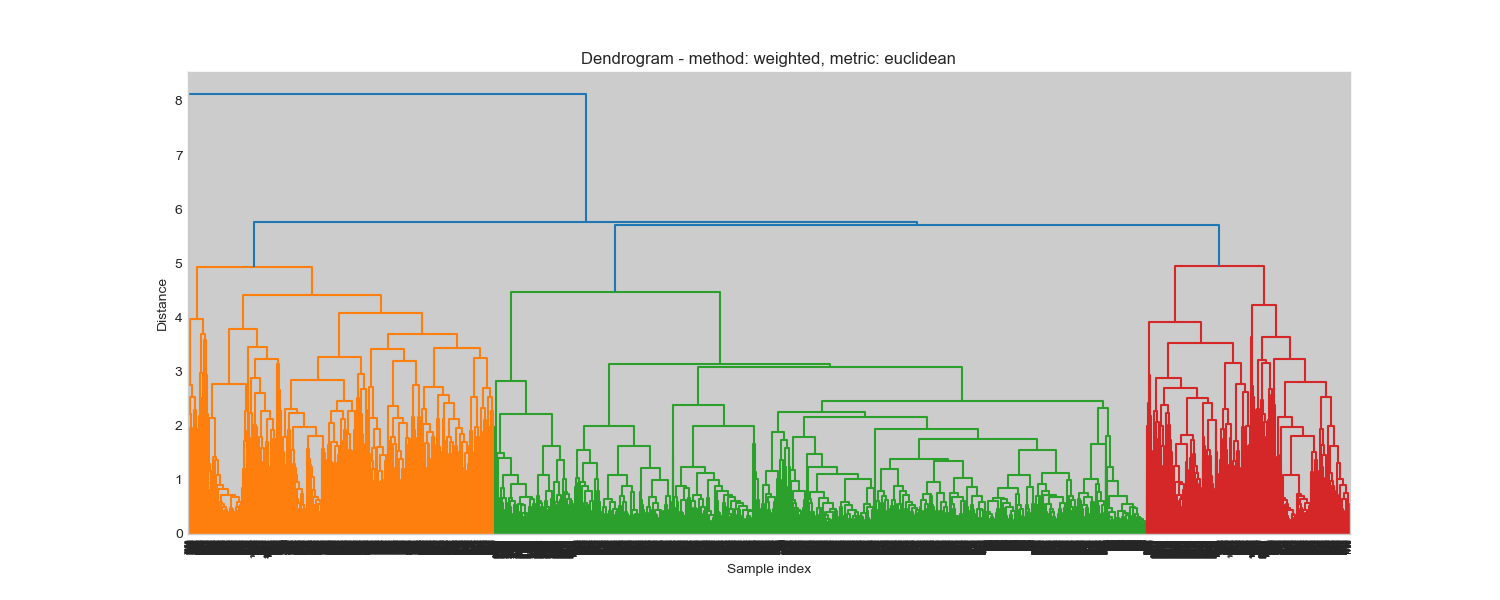

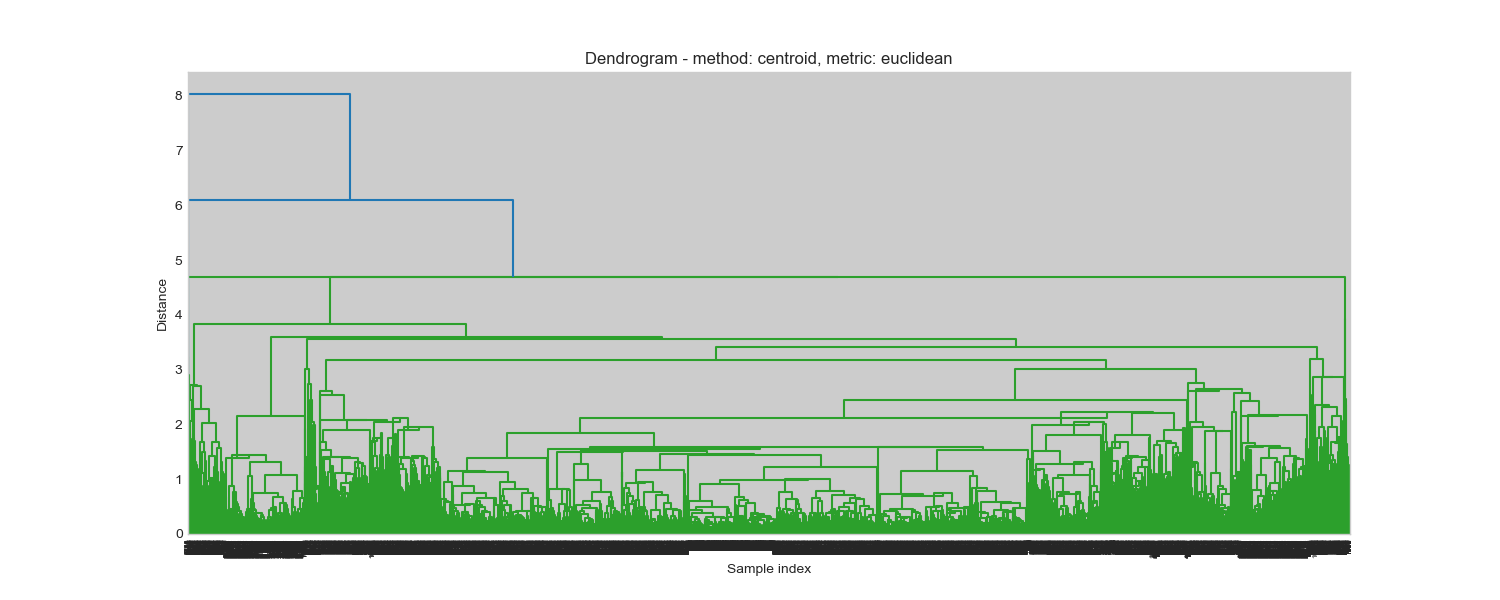

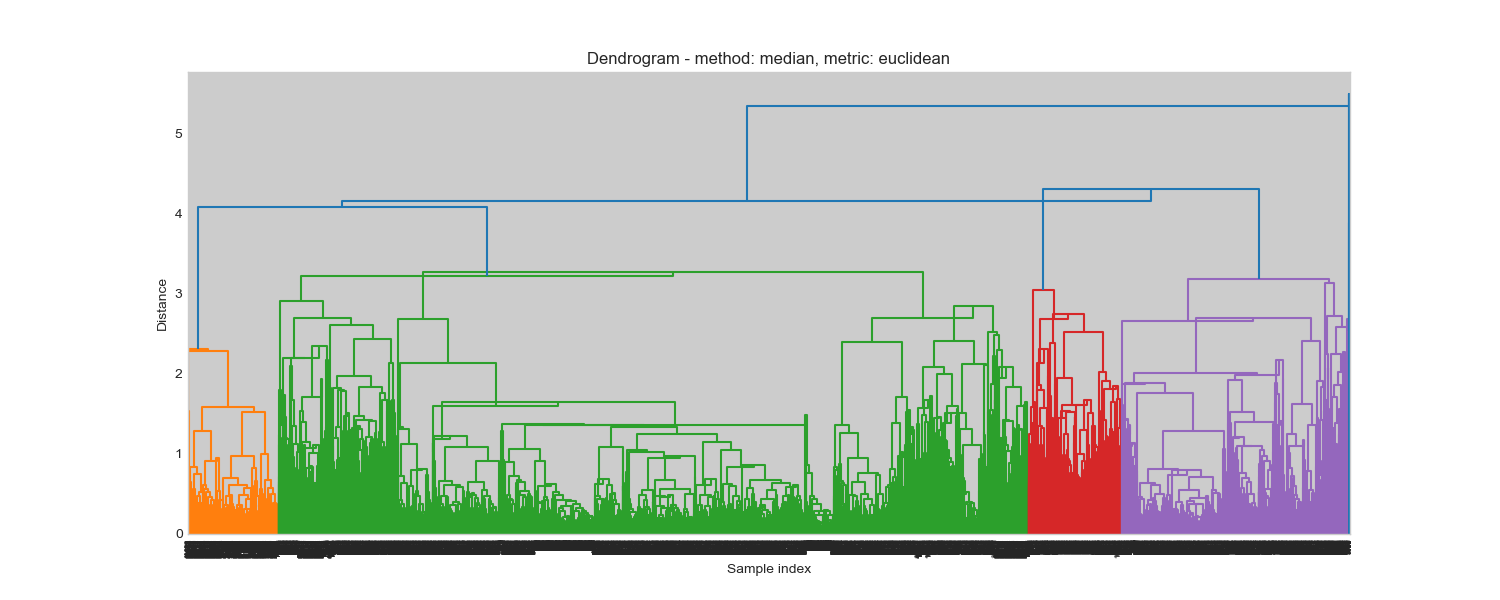

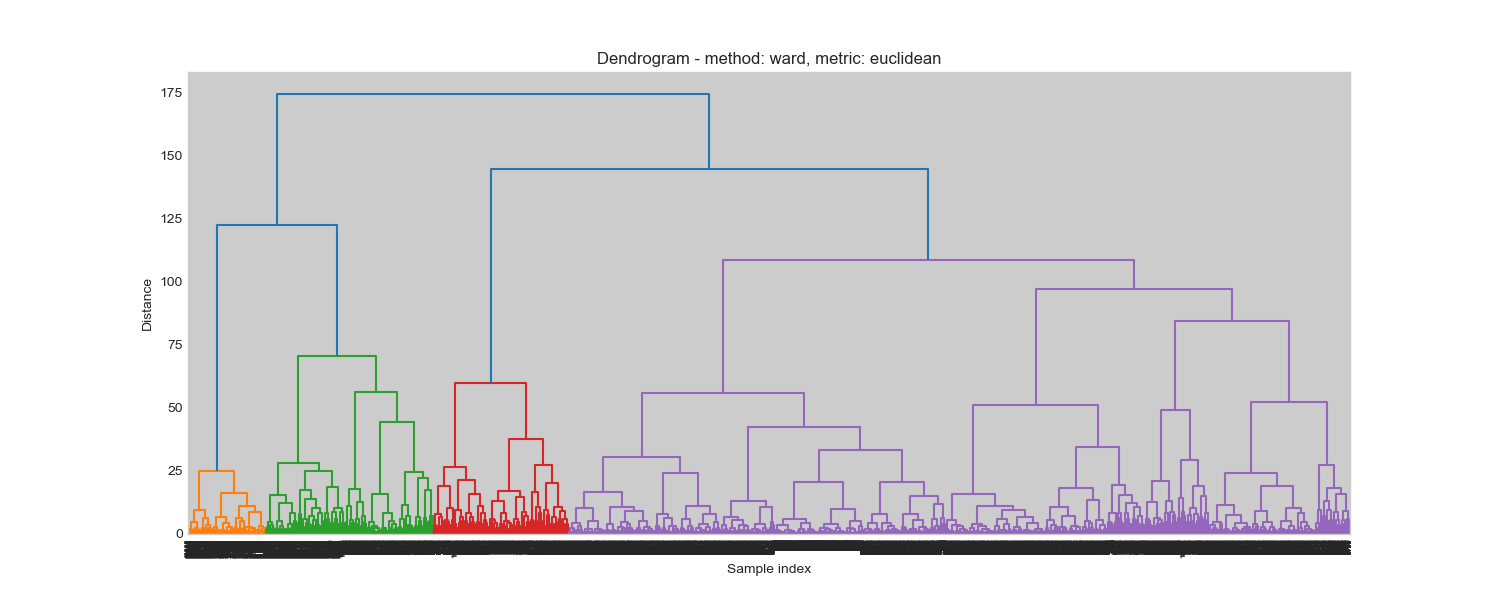

In [37]:
euclidean_res = evaluate_linkage(scaled_data_df_30s, "euclidean", linkage_methods)

In [38]:
linkage_methods.remove("centroid")
linkage_methods.remove("median")
linkage_methods.remove("ward")

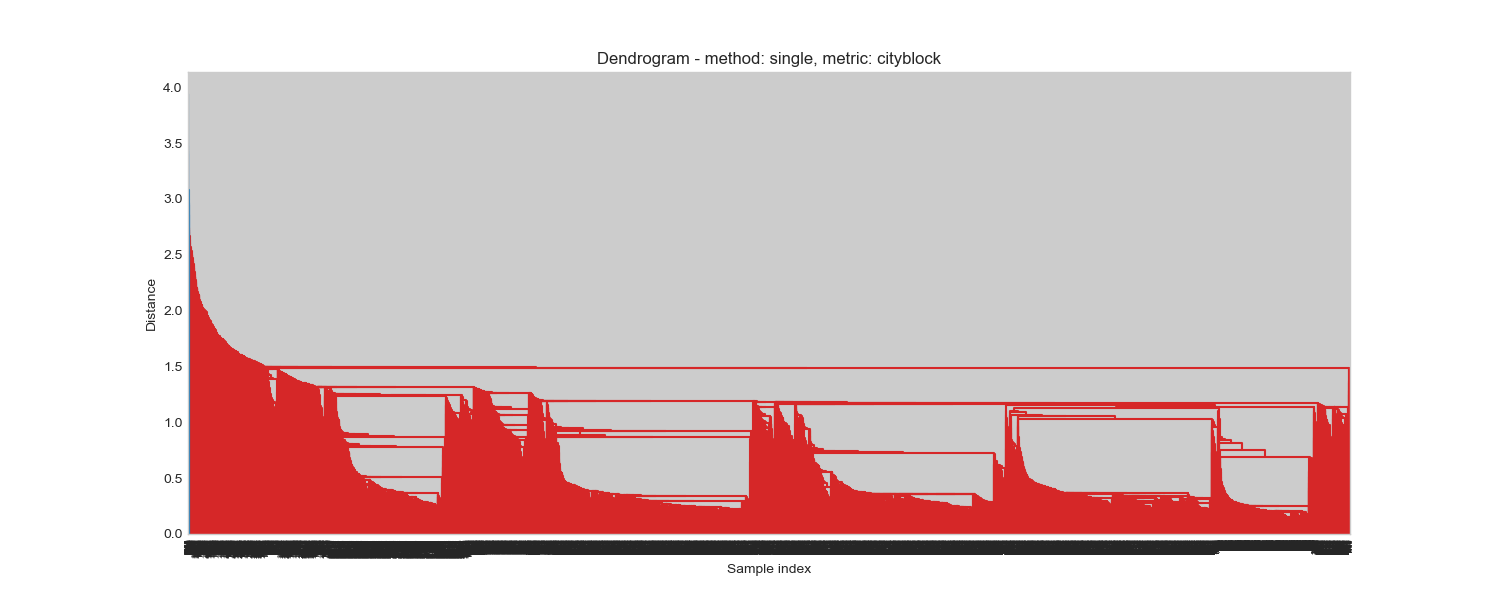

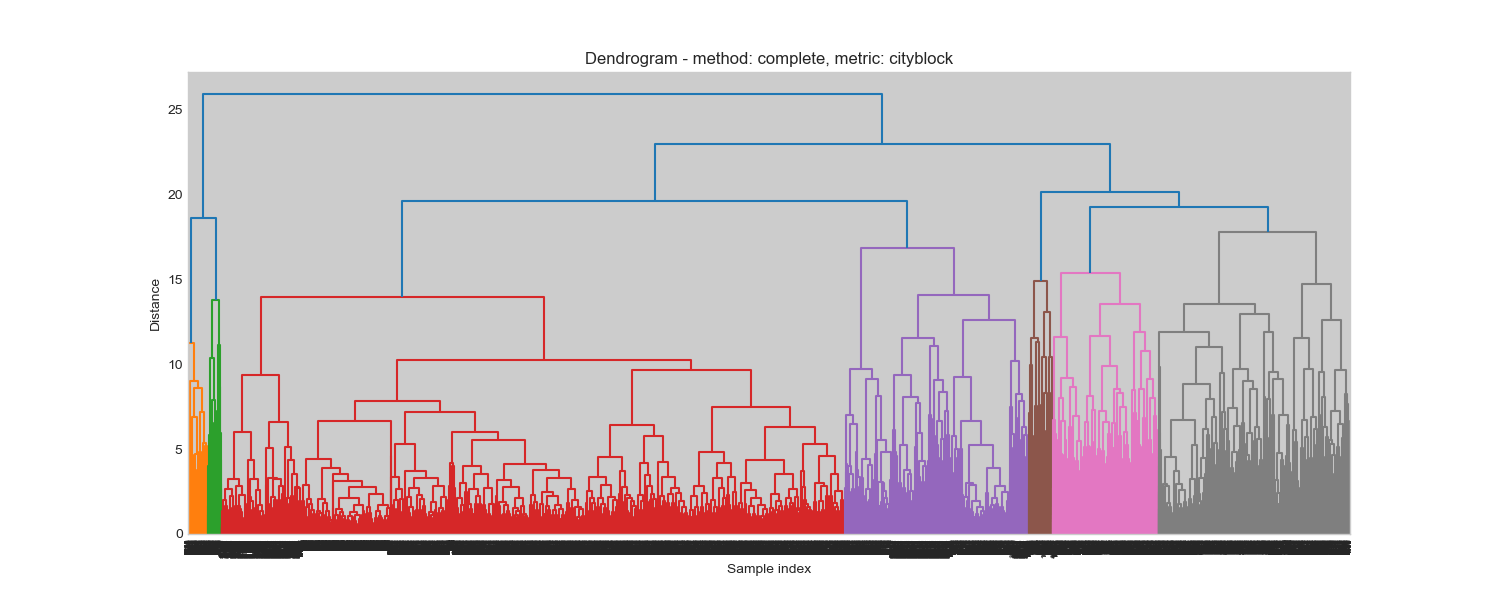

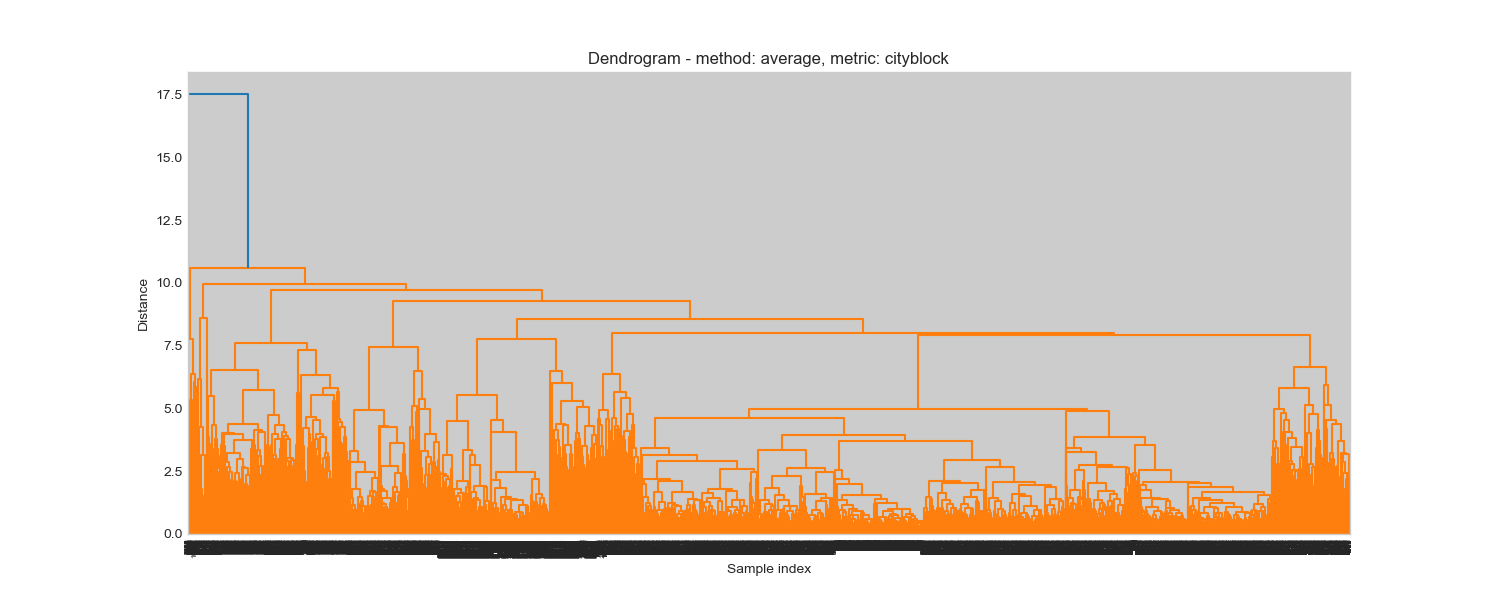

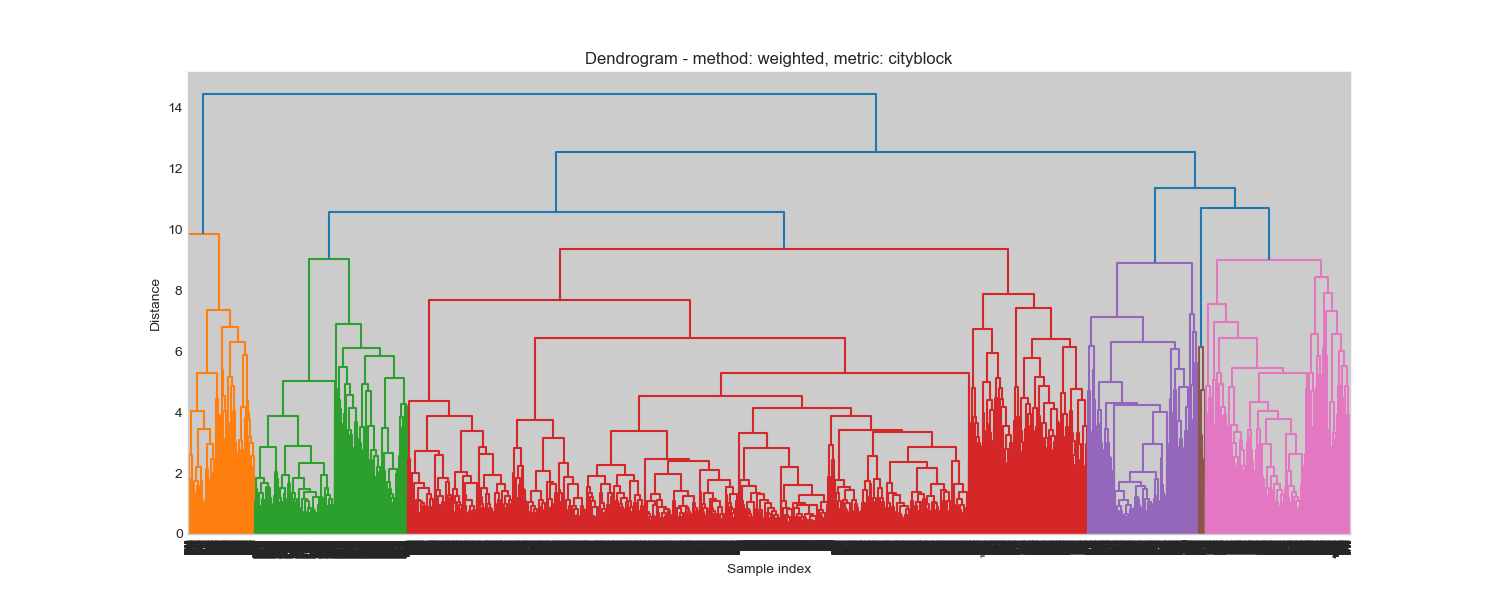

In [39]:
cityblock_res = evaluate_linkage(scaled_data_df_30s, "cityblock", linkage_methods)

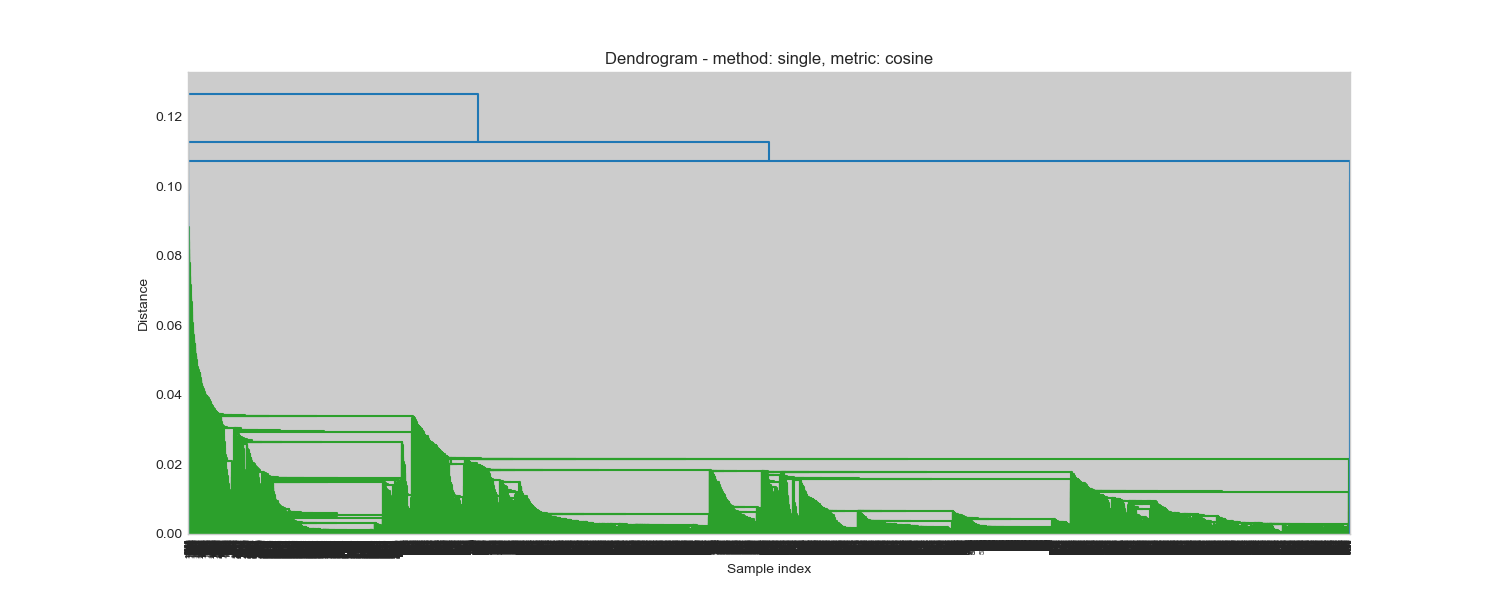

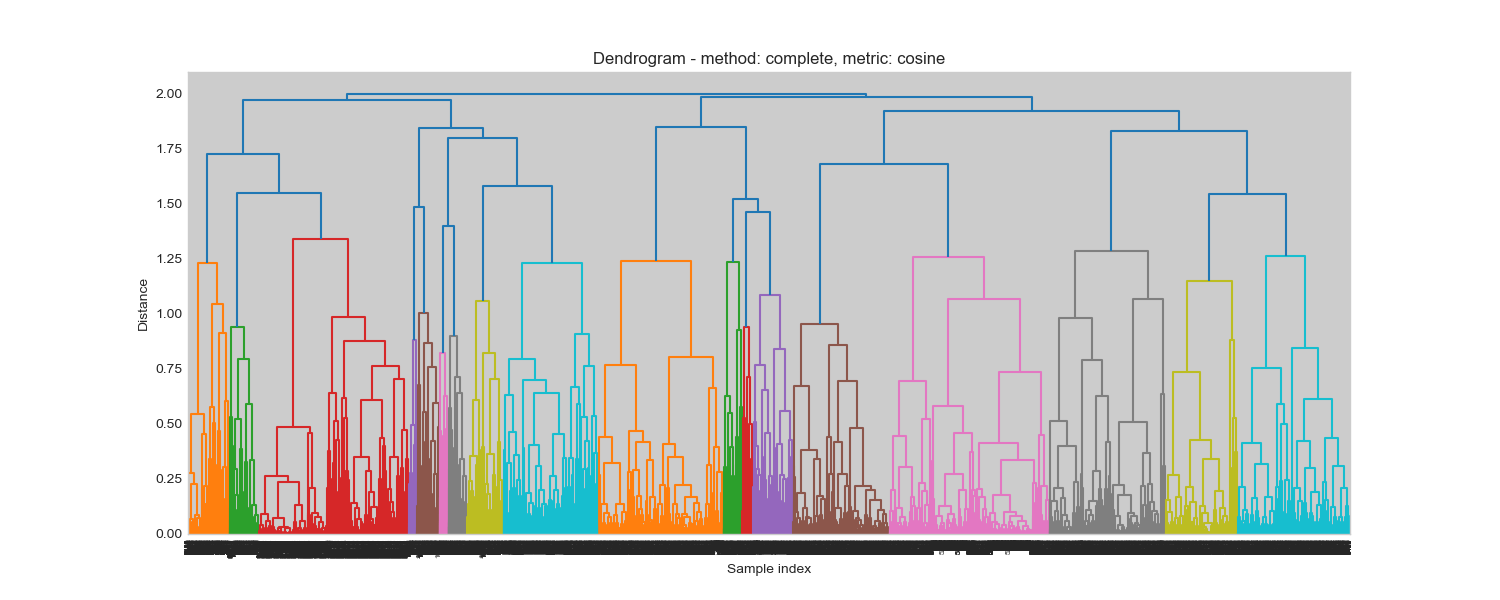

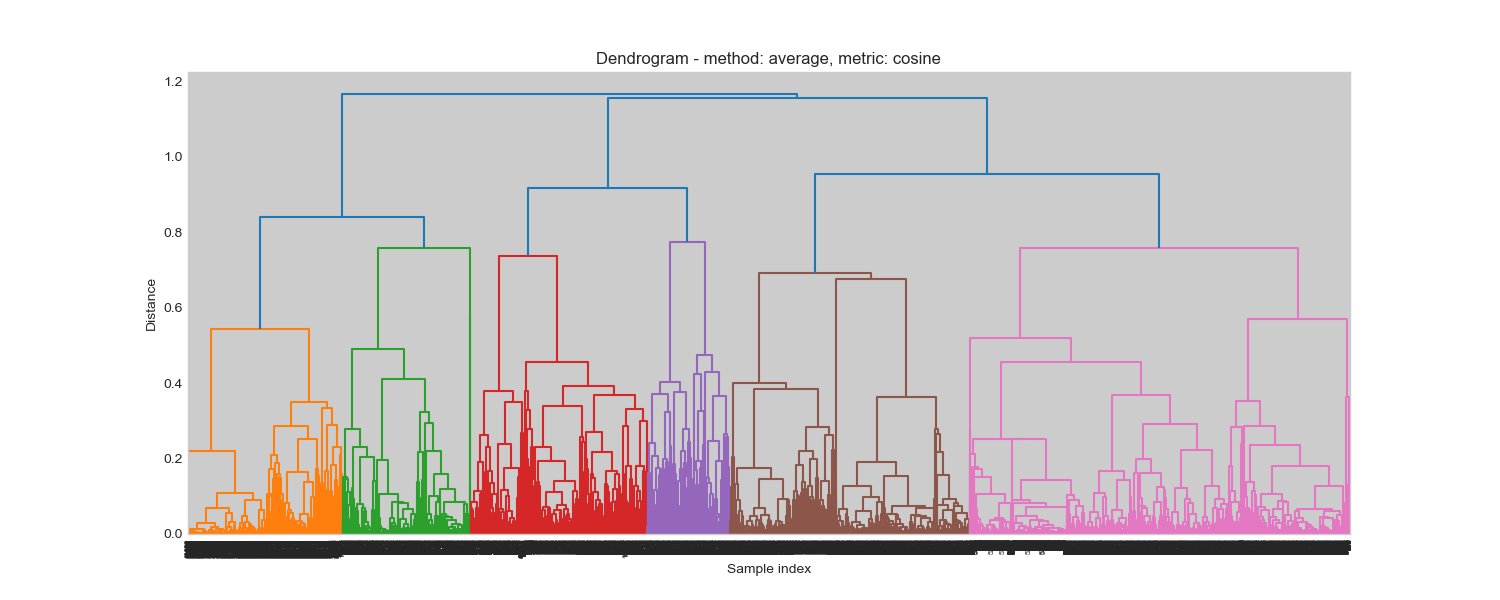

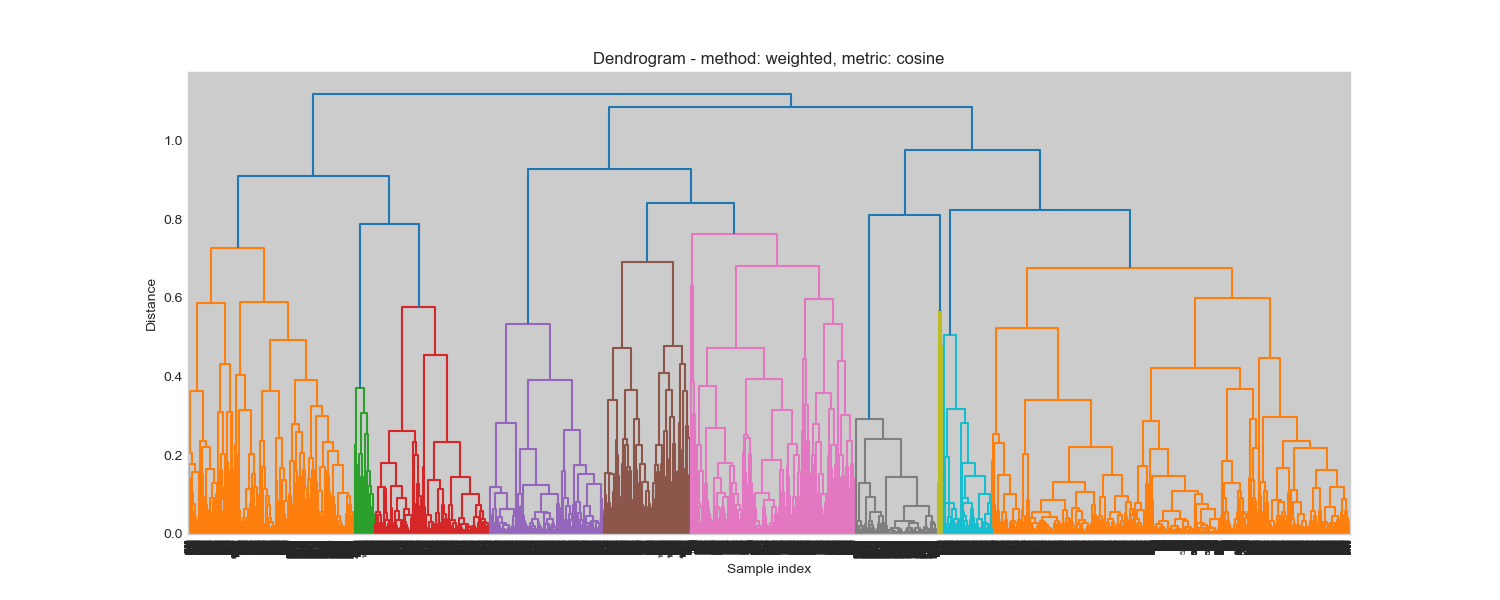

In [40]:
cosine_res = evaluate_linkage(scaled_data_df_30s, "cosine", linkage_methods)

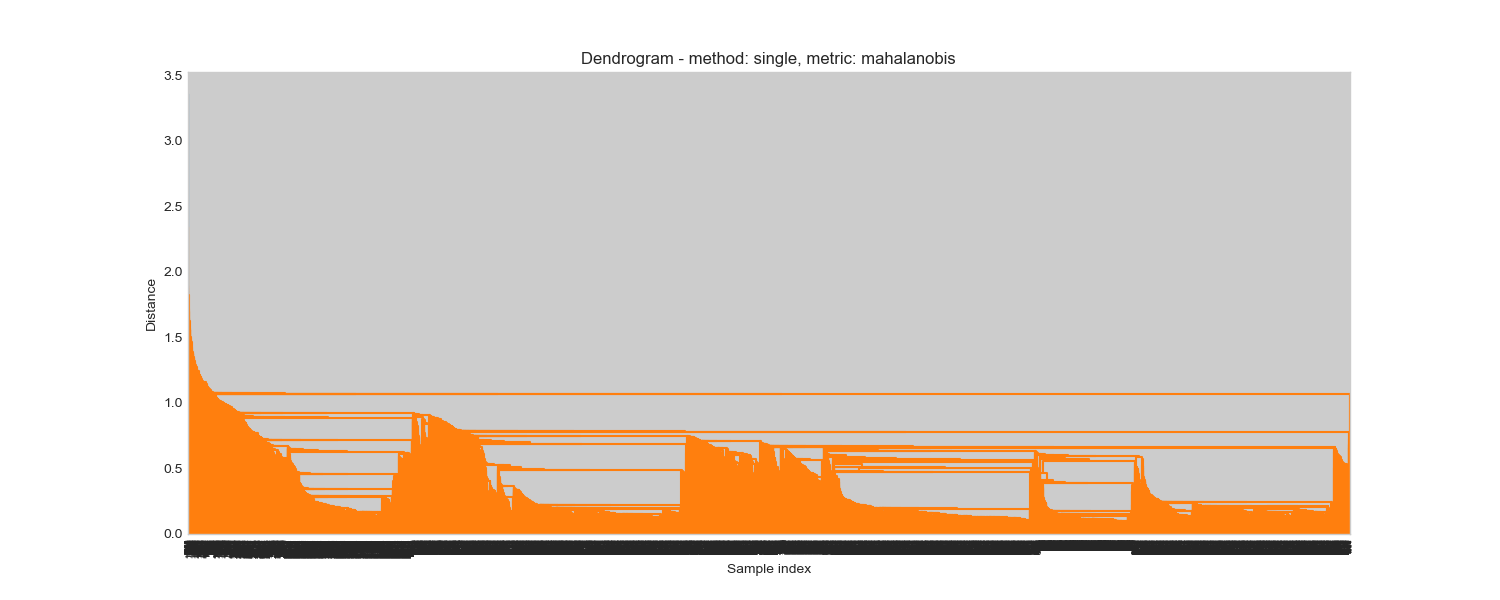

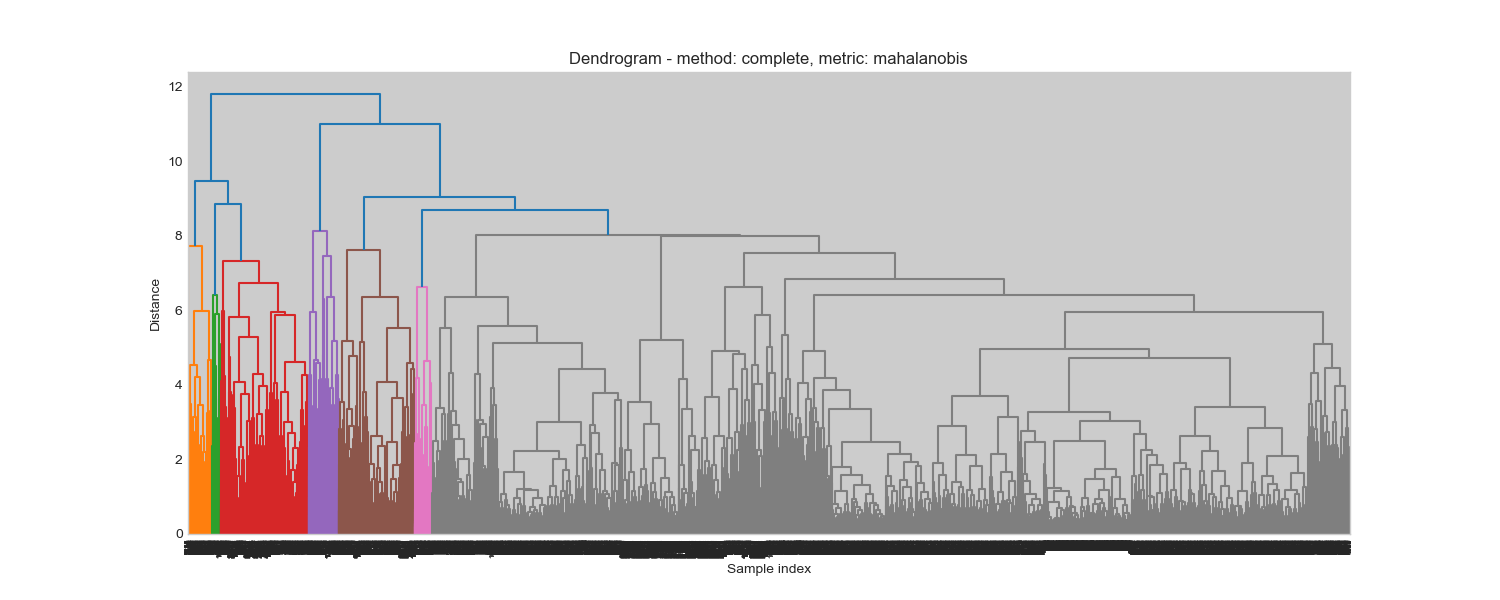

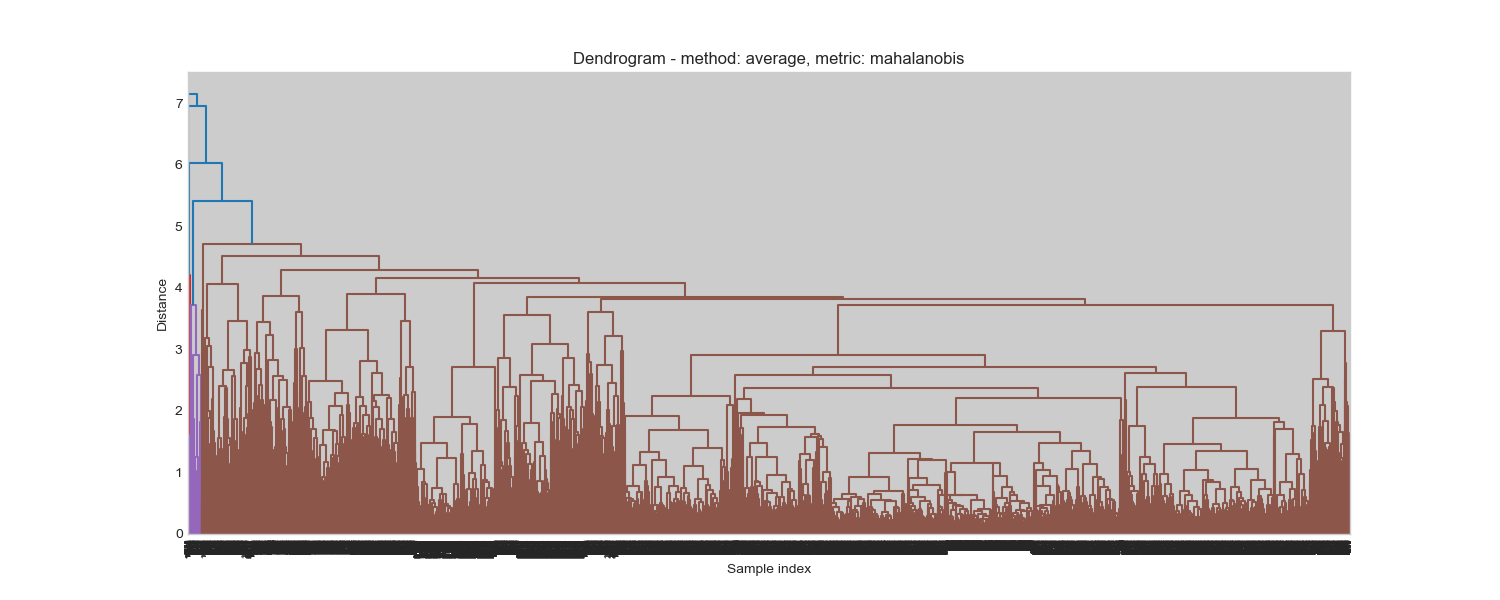

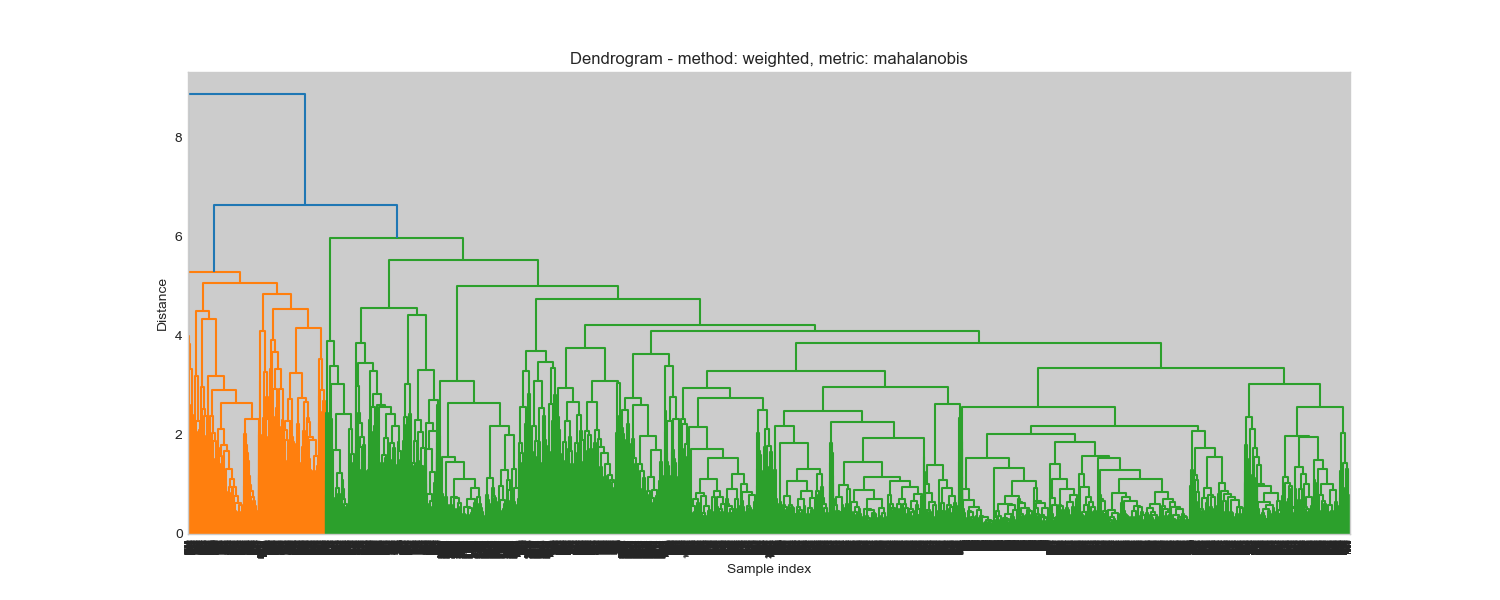

In [41]:
mahalanobis_res = evaluate_linkage(scaled_data_df_30s, "mahalanobis", linkage_methods)

In [42]:
def visualize_coph_coeff(results, metrices, methods):
    df = pd.DataFrame(columns=["Metric/Method"] + methods)
    pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

    for res, metric in zip(results, metrices):
        row = []
        row.append(metric)
        for method in methods:
            if metric != "euclidean" and method in ["centroid", "median", "ward"]:
                row.append(None)
            else:
                row.append(res["coph_correlations"][method])
        
        df.loc[len(df.index)] = row
        
    print(pdtabulate(df.round(3)))

In [43]:
results = [euclidean_res, cityblock_res, cosine_res, mahalanobis_res]
metrices = ["euclidean", "cityblock", "cosine", "mahalanobis"]
methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

visualize_coph_coeff(results, metrices, methods)

+-----------------+----------+------------+-----------+------------+------------+----------+---------+
| Metric/Method   |   single |   complete |   average |   weighted |   centroid |   median |    ward |
|-----------------+----------+------------+-----------+------------+------------+----------+---------|
| euclidean       |    0.604 |      0.612 |     0.794 |      0.66  |      0.801 |     0.58 |   0.676 |
| cityblock       |    0.56  |      0.687 |     0.748 |      0.604 |    nan     |   nan    | nan     |
| cosine          |    0.35  |      0.568 |     0.664 |      0.608 |    nan     |   nan    | nan     |
| mahalanobis     |    0.624 |      0.575 |     0.761 |      0.598 |    nan     |   nan    | nan     |
+-----------------+----------+------------+-----------+------------+------------+----------+---------+


Najbolji rezultat dobijen je za "euclidean" rastojanje, kada se koristi "ward" metod.

In [44]:
best_linkage = euclidean_res["linkages"]["ward"]

### Četvrti korak - određivanje optimalnog broja klastera

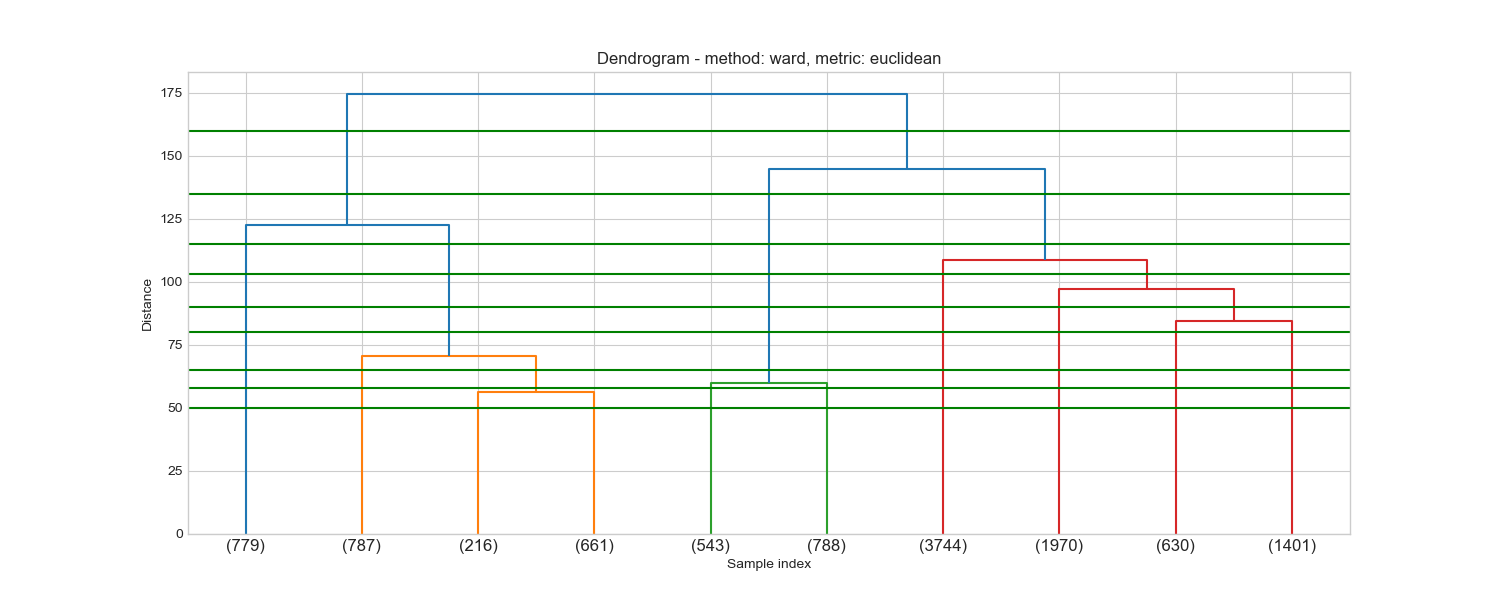

In [75]:
plt.figure(figsize=(15, 6))
dendrogram(best_linkage, truncate_mode="lastp", p=10)
plt.axhline(y=160, color='g', linestyle='-')    # 2 clusters
plt.axhline(y=135, color='g', linestyle='-')    # 3 clusters
plt.axhline(y=115, color='g', linestyle='-')    # 4 clusters
plt.axhline(y=103, color='g', linestyle='-')    # 5 clusters
plt.axhline(y=90, color='g', linestyle='-')     # 6 clusters
plt.axhline(y=80, color='g', linestyle='-')     # 7 clusters
plt.axhline(y=65, color='g', linestyle='-')     # 8 clusters
plt.axhline(y=58, color='g', linestyle='-')     # 9 clusters
plt.axhline(y=50, color='g', linestyle='-')     # 10 clusters
plt.title(f"Dendrogram - method: ward, metric: euclidean")
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [46]:
def find_cluster_num(data, best_linkage, max_distances, score):
    number_of_clusters = 2
    scores = {}

    for distance in max_distances:
        clusters = fcluster(best_linkage, distance, criterion="distance")

        if score == "silhouette_score":
            eval_score = silhouette_score(data, clusters)
        if score == "calinski_harabasz_score":
            eval_score = calinski_harabasz_score(data, clusters)
            
        scores[number_of_clusters] = eval_score
        number_of_clusters = number_of_clusters + 1

    return scores

In [76]:
max_distances = [160, 135, 115, 103, 90, 80, 65, 58, 50]
silhouette_scores = find_cluster_num(scaled_data_df_30s, best_linkage, max_distances, "silhouette_score")
calinski_harabasz_scores = find_cluster_num(scaled_data_df_30s, best_linkage, max_distances, "calinski_harabasz_score")

In [48]:
def visualize_clustering_scores(scores, score_names):
    df = pd.DataFrame(columns=["Score/Clusters"] + list(range(2, 11)))
    pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

    for score, name in zip(scores, score_names):
        row = []
        row.append(name)
        for key in score.keys():
            row.append(score[key])
        df.loc[len(df.index)] = row
        
    print(pdtabulate(df.round(3)))

In [77]:
scores = [silhouette_scores, calinski_harabasz_scores]
score_names = ["Silhouette", "Calinski-Harabasz"]
visualize_clustering_scores(scores, score_names)

+-------------------+---------+----------+----------+----------+----------+----------+----------+---------+----------+
| Score/Clusters    |       2 |        3 |        4 |        5 |        6 |        7 |        8 |       9 |       10 |
|-------------------+---------+----------+----------+----------+----------+----------+----------+---------+----------|
| Silhouette        |    0.3  |    0.301 |    0.322 |    0.217 |    0.242 |    0.269 |    0.279 |    0.28 |    0.254 |
| Calinski-Harabasz | 2683.01 | 2693.54  | 2689.2   | 2711.8   | 2743.91  | 2737.05  | 2667.84  | 2567.95 | 2385.34  |
+-------------------+---------+----------+----------+----------+----------+----------+----------+---------+----------+


Za dalju analizu odabrana su 4 klastera.

### Peti korak - primena i evaluacija algoritma

In [78]:
clusters = fcluster(best_linkage, 115, criterion="distance")
data_30s["Cluster"] = clusters

In [51]:
def evaluate_clusters(features, clusters):
    sil_score = silhouette_score(features, clusters).round(2)
    ch_score = calinski_harabasz_score(features, clusters).round(2)
    db_score = davies_bouldin_score(features, clusters).round(2)

    print("Silhouette score: " + str(sil_score))
    print("Calinski-Harabasz score: " + str(ch_score))
    print("Davies-Bouldin score: " + str(db_score))

In [79]:
evaluate_clusters(scaled_data_df_30s, clusters)

Silhouette score: 0.32
Calinski-Harabasz score: 2689.2
Davies-Bouldin score: 1.21


In [81]:
data_30s["Cluster"].value_counts()

Cluster
4    7745
2    1664
3    1331
1     779
Name: count, dtype: int64

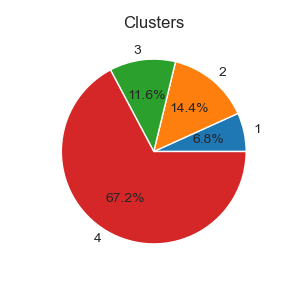

In [82]:
plt.figure(figsize=(3, 3))
plt.title("Clusters")
data_30s.groupby("Cluster").size().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [55]:
def visualize_clusters(features, clusters):
    fig = plt.figure(figsize=(10, 7))

    pca_2d = PCA(n_components=2)
    pcs = pca_2d.fit_transform(features)
    pc1_values_2d = pcs[:, 0]
    pc2_values_2d = pcs[:, 1]
   
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax1.set_title("2D visualization")
    palette = sns.color_palette("bright", n_colors=len(set(clusters)))  
    sns.scatterplot(x=pc1_values_2d, y=pc2_values_2d, hue=clusters, palette=palette, alpha=0.8, legend='full')

    pca_3d = PCA(n_components=3)
    pcs = pca_3d.fit_transform(features)
    pc1_values_3d = pcs[:, 0]
    pc2_values_3d = pcs[:, 1]
    pc3_values_3d = pcs[:, 2]

    ax2 = fig.add_subplot(2, 1, 2, projection="3d", elev=48, azim=134)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")
    ax2.set_title("3D visualization")
    cmap = ListedColormap(palette)
    ax2.scatter3D(pc1_values_3d, pc2_values_3d, pc3_values_3d, c=clusters, cmap=cmap)

    plt.tight_layout()

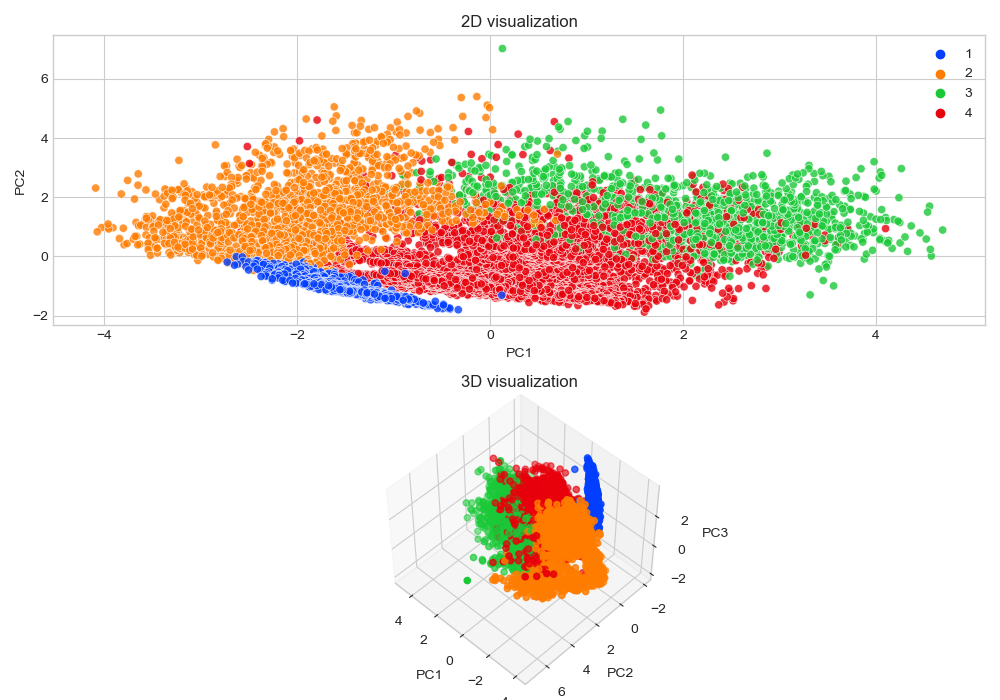

In [83]:
visualize_clusters(scaled_data_df_30s, clusters)

In [57]:
def do_lasso(X, clusters, columns):
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, clusters)
    
    coef = pd.Series(lasso.coef_, index = columns)
    imp_coef = coef.sort_values()
    
    plt.figure(figsize=(12, 5))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    plt.show()

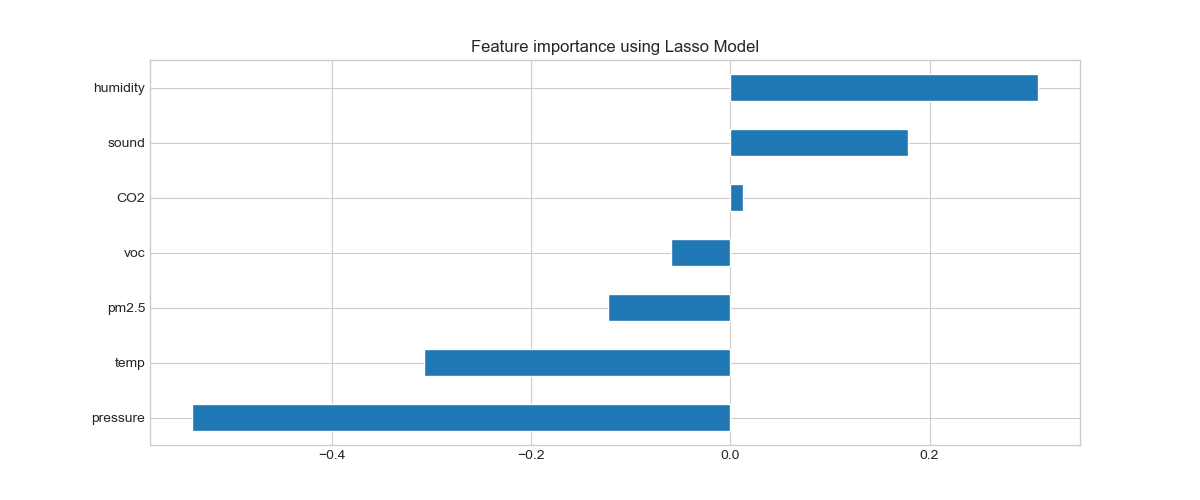

In [84]:
do_lasso(scaled_data_df_30s, clusters, list(scaled_data_df_30s.columns))

In [85]:
features = list(data_30s.columns)
features.remove('Cluster')
data_30s.groupby('Cluster')[features].mean().T

Cluster              1             2             3             4
sound         1.139254      1.241119      0.117705      1.135812
pressure   1022.351149   1015.137774   1014.509285   1014.031194
temp         26.316534     27.075283     24.544004     24.682271
humidity     33.514196     30.427621     36.724766     35.294980
voc       29450.959564  31546.895433  31664.023416  30201.482709
pm1.0        32.335687     59.879507     91.522164     42.517624
pm2.5        46.906290     75.341647    117.773228     61.036518
pm10         58.618742     84.263221    127.726772     72.904541
CO2         449.892169    423.186255    453.574455    444.142238

In [92]:
data_30s[data_30s['Cluster'] == 1].drop(['Cluster'], axis=1).describe()

sound     pressure        temp    humidity           voc  \
count  779.000000   779.000000  779.000000  779.000000    779.000000   
mean     1.139254  1022.351149   26.316534   33.514196  29450.959564   
std      0.102296     1.234015    0.502261    0.547554    261.132736   
min      0.000000  1019.945823   25.439342   31.926970  29207.000000   
25%      1.087628  1021.149252   25.880402   33.130106  29275.000000   
50%      1.139267  1022.522089   26.229148   33.515498  29334.000000   
75%      1.197359  1023.423147   26.770220   33.977014  29510.250000   
max      1.516870  1024.025864   27.424127   34.640851  30290.000000   

            pm1.0       pm2.5        pm10         CO2  
count  779.000000  779.000000  779.000000  779.000000  
mean    32.335687   46.906290   58.618742  449.892169  
std      1.061701    1.435261    2.277578   20.289056  
min     30.000000   43.000000   53.000000  407.000000  
25%     32.000000   46.000000   57.000000  436.000000  
50%     32.000000   47.000000   58.000000  449.000000  
75%     33.000000   48.000000   60.750000  462.250000  
max     35.000000   51.000000   64.000000  509.000000

In [93]:
data_30s[data_30s['Cluster'] == 2].drop(['Cluster'], axis=1).describe()

sound     pressure         temp     humidity           voc  \
count  1664.000000  1664.000000  1664.000000  1664.000000   1664.000000   
mean      1.241119  1015.137774    27.075283    30.427621  31546.895433   
std       0.558233     2.658553     0.607979     1.641257   1450.607987   
min       0.000000  1012.183550    24.664929    27.270590  28470.000000   
25%       1.138863  1012.620155    26.813814    29.005053  30429.000000   
50%       1.329682  1013.637077    27.183079    30.167635  31704.750000   
75%       1.471687  1017.480625    27.465157    31.898945  32799.000000   
max       3.269340  1020.050028    28.244723    34.938433  34508.500000   

             pm1.0        pm2.5         pm10          CO2  
count  1664.000000  1664.000000  1664.000000  1664.000000  
mean     59.879507    75.341647    84.263221   423.186255  
std      26.763963    26.791443    24.118235    22.390393  
min      28.000000    40.000000    49.000000   400.000000  
25%      38.875000    54.000000    68.000000   405.000000  
50%      52.000000    68.000000    76.000000   414.000000  
75%      77.000000    93.625000    99.000000   438.500000  
max     196.000000   203.000000   205.000000   505.000000

In [94]:
data_30s[data_30s['Cluster'] == 3].drop(['Cluster'], axis=1).describe()

sound     pressure         temp     humidity           voc  \
count  1331.000000  1331.000000  1331.000000  1331.000000   1331.000000   
mean      0.117705  1014.509285    24.544004    36.724766  31664.023416   
std       0.154404     0.982956     1.033393     2.335216   1027.877439   
min       0.000000  1012.211707    20.428851    28.087213  29166.000000   
25%       0.000000  1013.797031    24.008477    34.919230  30910.000000   
50%       0.000000  1014.075463    24.695700    37.327624  31755.000000   
75%       0.235599  1015.467221    25.295742    38.374326  32394.750000   
max       1.055355  1016.794038    27.706206    41.340856  34362.500000   

             pm1.0        pm2.5         pm10          CO2  
count  1331.000000  1331.000000  1331.000000  1331.000000  
mean     91.522164   117.773228   127.726772   453.574455  
std      27.391620    28.889524    30.786811    36.437727  
min      30.000000    50.000000    62.000000   400.000000  
25%      72.000000    98.000000   106.000000   417.000000  
50%      90.000000   117.000000   127.000000   456.000000  
75%     108.000000   137.000000   147.000000   482.000000  
max     263.000000   271.000000   402.000000   559.000000

In [95]:
data_30s[data_30s['Cluster'] == 4].drop(['Cluster'], axis=1).describe()

sound     pressure         temp     humidity           voc  \
count  7745.000000  7745.000000  7745.000000  7745.000000   7745.000000   
mean      1.135812  1014.031194    24.682271    35.294980  30201.482709   
std       0.356172     1.104830     0.823435     1.952024   1150.182649   
min       0.000000  1011.883499    20.541674    28.967937  28679.000000   
25%       0.956919  1013.174931    24.357217    33.661928  29447.000000   
50%       1.027922  1013.935725    24.770064    35.313315  29651.000000   
75%       1.186064  1015.099212    25.162399    36.939590  30951.000000   
max       3.279022  1016.749168    27.126663    41.343419  34447.000000   

             pm1.0        pm2.5         pm10          CO2  
count  7745.000000  7745.000000  7745.000000  7745.000000  
mean     42.517624    61.036518    72.904541   444.142238  
std      20.087431    24.794496    24.925879    27.458471  
min      23.000000    33.000000    38.000000   400.000000  
25%      33.000000    48.000000    61.000000   422.000000  
50%      35.000000    52.000000    66.000000   441.000000  
75%      43.000000    64.500000    76.000000   463.000000  
max     203.000000   215.000000   218.000000   554.000000

Klaster 1: Povećan pritisak, povišena temperatura, blago povećana koncentracija CO2

Klaster 2: Smanjena vlažnost, povišena temperatura, povećana buka, blago povećana koncentracija PM čestica, blago povećana koncentracija isparljivih organskih jedinjenja 

Klaster 3: Povećana vlažnost, značajno smanjena buka, povećana koncentracija PM čestica, blago povećana koncentracija isparljivih organskih jedinjenja, blago povećana koncentracija CO2

Klaster 4: Normalno stanje sistema bez značajnih promena parametara

In [86]:
result = pd.DataFrame()
result["timestamp"] = data_30s.index
result["cluster"] = data_30s.Cluster.values
result.to_csv('result.csv', index=False)